In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

## 데이터 불러오기

### 물가정보 불러오기

In [2]:
target = pd.read_csv('신라면2.csv', index_col=False, thousands = ',')[['날짜','price']]
target['t'] = target['price'].str.replace(',', '')
target.drop('price', axis=1, inplace=True)
target = target[::-1]
target.loc[135] = ['2022년 4월', target.loc[0, 't']]
target.reset_index(inplace=True, drop=True)
target

,날짜,t
0,2011년 1월,-
1,2011년 2월,-
2,2011년 3월,2926
3,2011년 4월,2942
4,2011년 5월,2933
...,...,...
131,2021년 12월,3809
132,2022년 1월,3807
133,2022년 2월,3806
134,2022년 3월,3800


### 원자재 정보 불러오기

In [3]:
def make_df(csv_filename):
    df = pd.read_csv(csv_filename+' 선물내역.csv', thousands = ',')[['날짜', '종가', '거래량', '변동 %']]
    df['거래량'] = df['거래량'].str.replace('K','')
    df['변동 %'] = df['변동 %'].str.replace('%','')
    feature=['날짜', csv_filename+'종가', csv_filename+'거래량', csv_filename+'변동 %',]
    df = df[::-1]
    df.reset_index(inplace=True, drop=True)

    df = df.astype({
        '종가':'float64',
    })
    df.columns = feature
    return df
    
df1 = make_df('런던설탕')
df2 = make_df('런던소맥')
df3 = make_df('미국대두유')
df4 = make_df('미국소맥')
df5 = make_df('미국팜유')

In [4]:
df1

,날짜,런던설탕종가,런던설탕거래량,런던설탕변동 %
0,2011년 1월,811.6,78.07,4.39
1,2011년 2월,743.8,87.75,-8.35
2,2011년 3월,711.7,89.26,-4.32
3,2011년 4월,615.1,74.98,-13.57
4,2011년 5월,672.0,67.93,9.25
...,...,...,...,...
131,2021년 12월,497.1,64.34,2.37
132,2022년 1월,492.5,99.29,-0.93
133,2022년 2월,496.0,102.80,0.71
134,2022년 3월,541.5,119.60,9.17


In [5]:
type(df1), type(df2), type(df3),type(df4),type(df5)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [6]:
result = df1.merge(df2, on='날짜').merge(df3, on='날짜').merge(df4, on='날짜').merge(df5, on='날짜').merge(target, on='날짜')
result['날짜'] = pd.to_datetime(result['날짜'], format='%Y년 %m월')
result = result.replace('-', np.NaN)
result

,날짜,런던설탕종가,런던설탕거래량,런던설탕변동 %,런던소맥종가,런던소맥거래량,런던소맥변동 %,미국대두유종가,미국대두유거래량,미국대두유변동 %,미국소맥종가,미국소맥거래량,미국소맥변동 %,미국팜유종가,미국팜유거래량,미국팜유변동 %,t
0,2011-01-01,811.6,78.07,4.39,203.10,0.18,2.06,57.88,532.79,0.24,838.63,NaN,5.80,1255.25,NaN,1.56,NaN
1,2011-02-01,743.8,87.75,-8.35,201.00,0.87,-1.03,56.77,1.00M,-1.92,816.38,NaN,-2.65,1164.00,NaN,-7.27,NaN
2,2011-03-01,711.7,89.26,-4.32,202.00,1.01,0.50,58.78,763.57,3.54,759.13,NaN,-7.01,1116.50,NaN,-4.08,2926
3,2011-04-01,615.1,74.98,-13.57,205.00,3.30,1.49,58.13,914.89,-1.11,804.13,NaN,5.93,1138.00,NaN,1.93,2942
4,2011-05-01,672.0,67.93,9.25,193.00,0.75,-5.85,58.49,583.59,0.62,787.13,NaN,-2.11,1153.00,NaN,1.32,2933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2021-12-01,497.1,64.34,2.37,220.25,NaN,-1.91,56.30,290.59,2.16,770.75,480.19,-0.39,1238.75,NaN,0.53,3809
132,2022-01-01,492.5,99.29,-0.93,214.75,NaN,-2.50,64.82,502.08,15.13,761.25,44.59,-1.23,1381.00,NaN,11.48,3807
133,2022-02-01,496.0,102.80,0.71,250.55,NaN,16.67,72.89,817.30,12.45,928.00,1.06M,21.90,1774.75,NaN,28.51,3806
134,2022-03-01,541.5,119.60,9.17,307.50,0.81,22.73,69.94,497.88,-4.05,1006.00,0.15,8.41,1519.75,NaN,-14.37,3800


## 결측치 확인하기

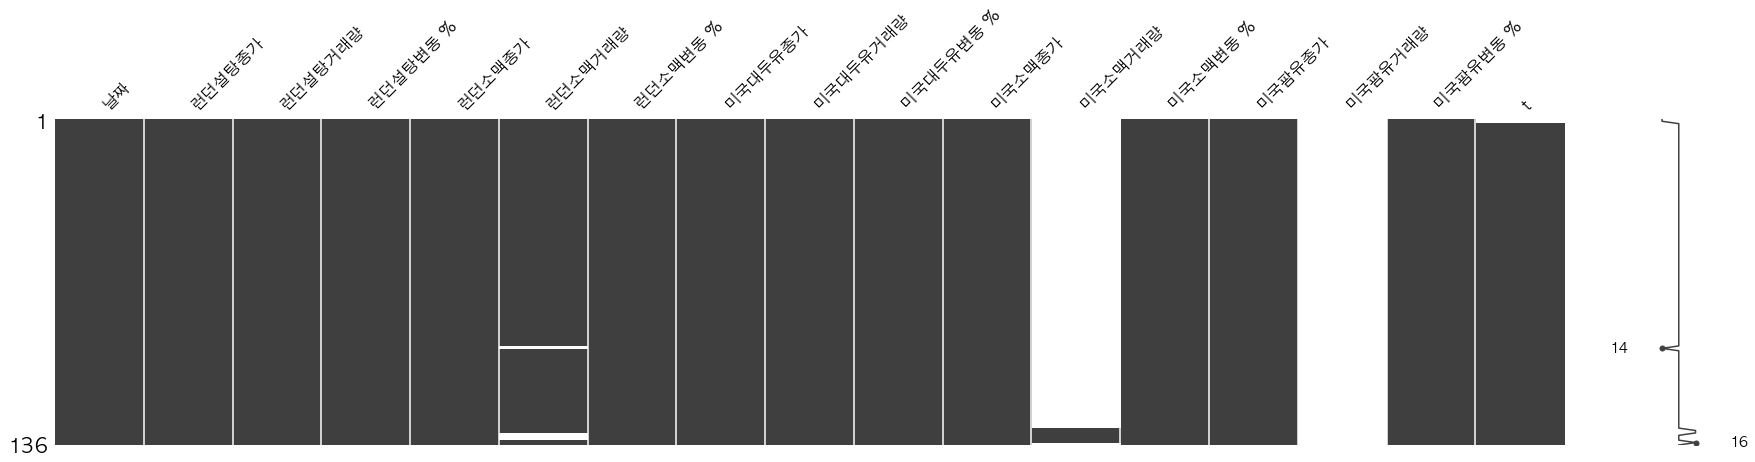

In [7]:
import missingno as msno

msno.matrix(df=result, figsize=(30,6))
plt.show()

- 미국 소맥거래량과 미국팜유거래량의 결측치가 과도하게 높으므로 해당 열을 삭제

In [8]:
result.drop(['미국소맥거래량', '미국팜유거래량'], axis=1, inplace=True)

- 나머지 자료들에 대해선 삭제하지 않고 시계열 자료임을 고려해서 주변값으로 채움.

In [9]:
result.fillna(method='ffill', inplace=True)
result.fillna(method='bfill', inplace=True)

In [10]:
result.isna().sum()

날짜           0
런던설탕종가       0
런던설탕거래량      0
런던설탕변동 %     0
런던소맥종가       0
런던소맥거래량      0
런던소맥변동 %     0
미국대두유종가      0
미국대두유거래량     0
미국대두유변동 %    0
미국소맥종가       0
미국소맥변동 %     0
미국팜유종가       0
미국팜유변동 %     0
t            0
dtype: int64

In [11]:
result

,날짜,런던설탕종가,런던설탕거래량,런던설탕변동 %,런던소맥종가,런던소맥거래량,런던소맥변동 %,미국대두유종가,미국대두유거래량,미국대두유변동 %,미국소맥종가,미국소맥변동 %,미국팜유종가,미국팜유변동 %,t
0,2011-01-01,811.6,78.07,4.39,203.10,0.18,2.06,57.88,532.79,0.24,838.63,5.80,1255.25,1.56,2926
1,2011-02-01,743.8,87.75,-8.35,201.00,0.87,-1.03,56.77,1.00M,-1.92,816.38,-2.65,1164.00,-7.27,2926
2,2011-03-01,711.7,89.26,-4.32,202.00,1.01,0.50,58.78,763.57,3.54,759.13,-7.01,1116.50,-4.08,2926
3,2011-04-01,615.1,74.98,-13.57,205.00,3.30,1.49,58.13,914.89,-1.11,804.13,5.93,1138.00,1.93,2942
4,2011-05-01,672.0,67.93,9.25,193.00,0.75,-5.85,58.49,583.59,0.62,787.13,-2.11,1153.00,1.32,2933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,2021-12-01,497.1,64.34,2.37,220.25,0.08,-1.91,56.30,290.59,2.16,770.75,-0.39,1238.75,0.53,3809
132,2022-01-01,492.5,99.29,-0.93,214.75,0.08,-2.50,64.82,502.08,15.13,761.25,-1.23,1381.00,11.48,3807
133,2022-02-01,496.0,102.80,0.71,250.55,0.08,16.67,72.89,817.30,12.45,928.00,21.90,1774.75,28.51,3806
134,2022-03-01,541.5,119.60,9.17,307.50,0.81,22.73,69.94,497.88,-4.05,1006.00,8.41,1519.75,-14.37,3800


- 거래량의 단위가 M과 K가 있었는데 K만 일괄적으로 제거하여 M은 남아있음.
- 이 부분을 처리해줌

In [12]:
def M_to_K(x):
    if 'M' in x:
        x = float(x[:-1])*1000000
    else:
        x = float(x)*1000
    return str(x)
result['미국대두유거래량'] = result['미국대두유거래량'].apply(M_to_K)

- 숫자형 변수여야할 변수들을 수자형 변수로 지정하여줌

In [13]:
result = result.astype({
    '런던설탕거래량':'float64',
    '런던설탕변동 %':'float64',
    '런던소맥거래량':'float64',
    '런던소맥변동 %':'float64',
    '미국소맥변동 %':'float64',
    '미국대두유거래량':'float64',
    '미국대두유변동 %':'float64',
    '미국팜유변동 %':'float64',
    't':'float64'
})

## 상관관계


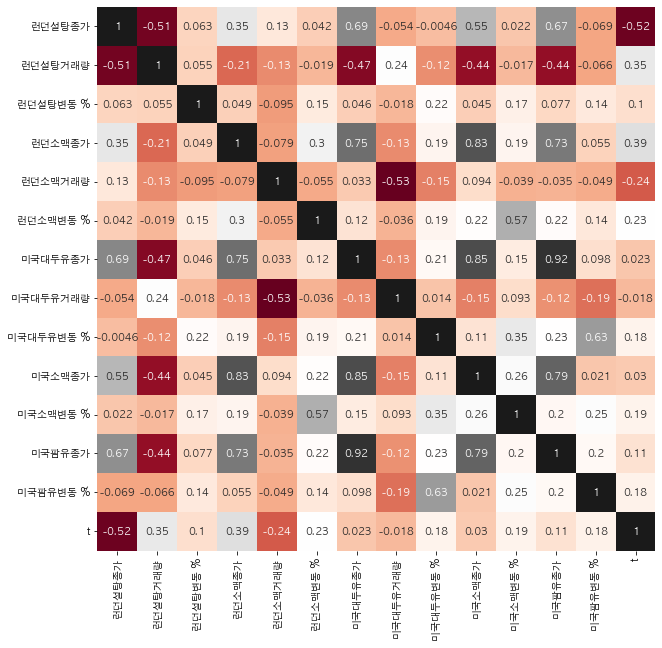

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(result.corr(), annot=True, cmap='RdGy', cbar=False)
plt.savefig('savefig_default.png')
plt.show()


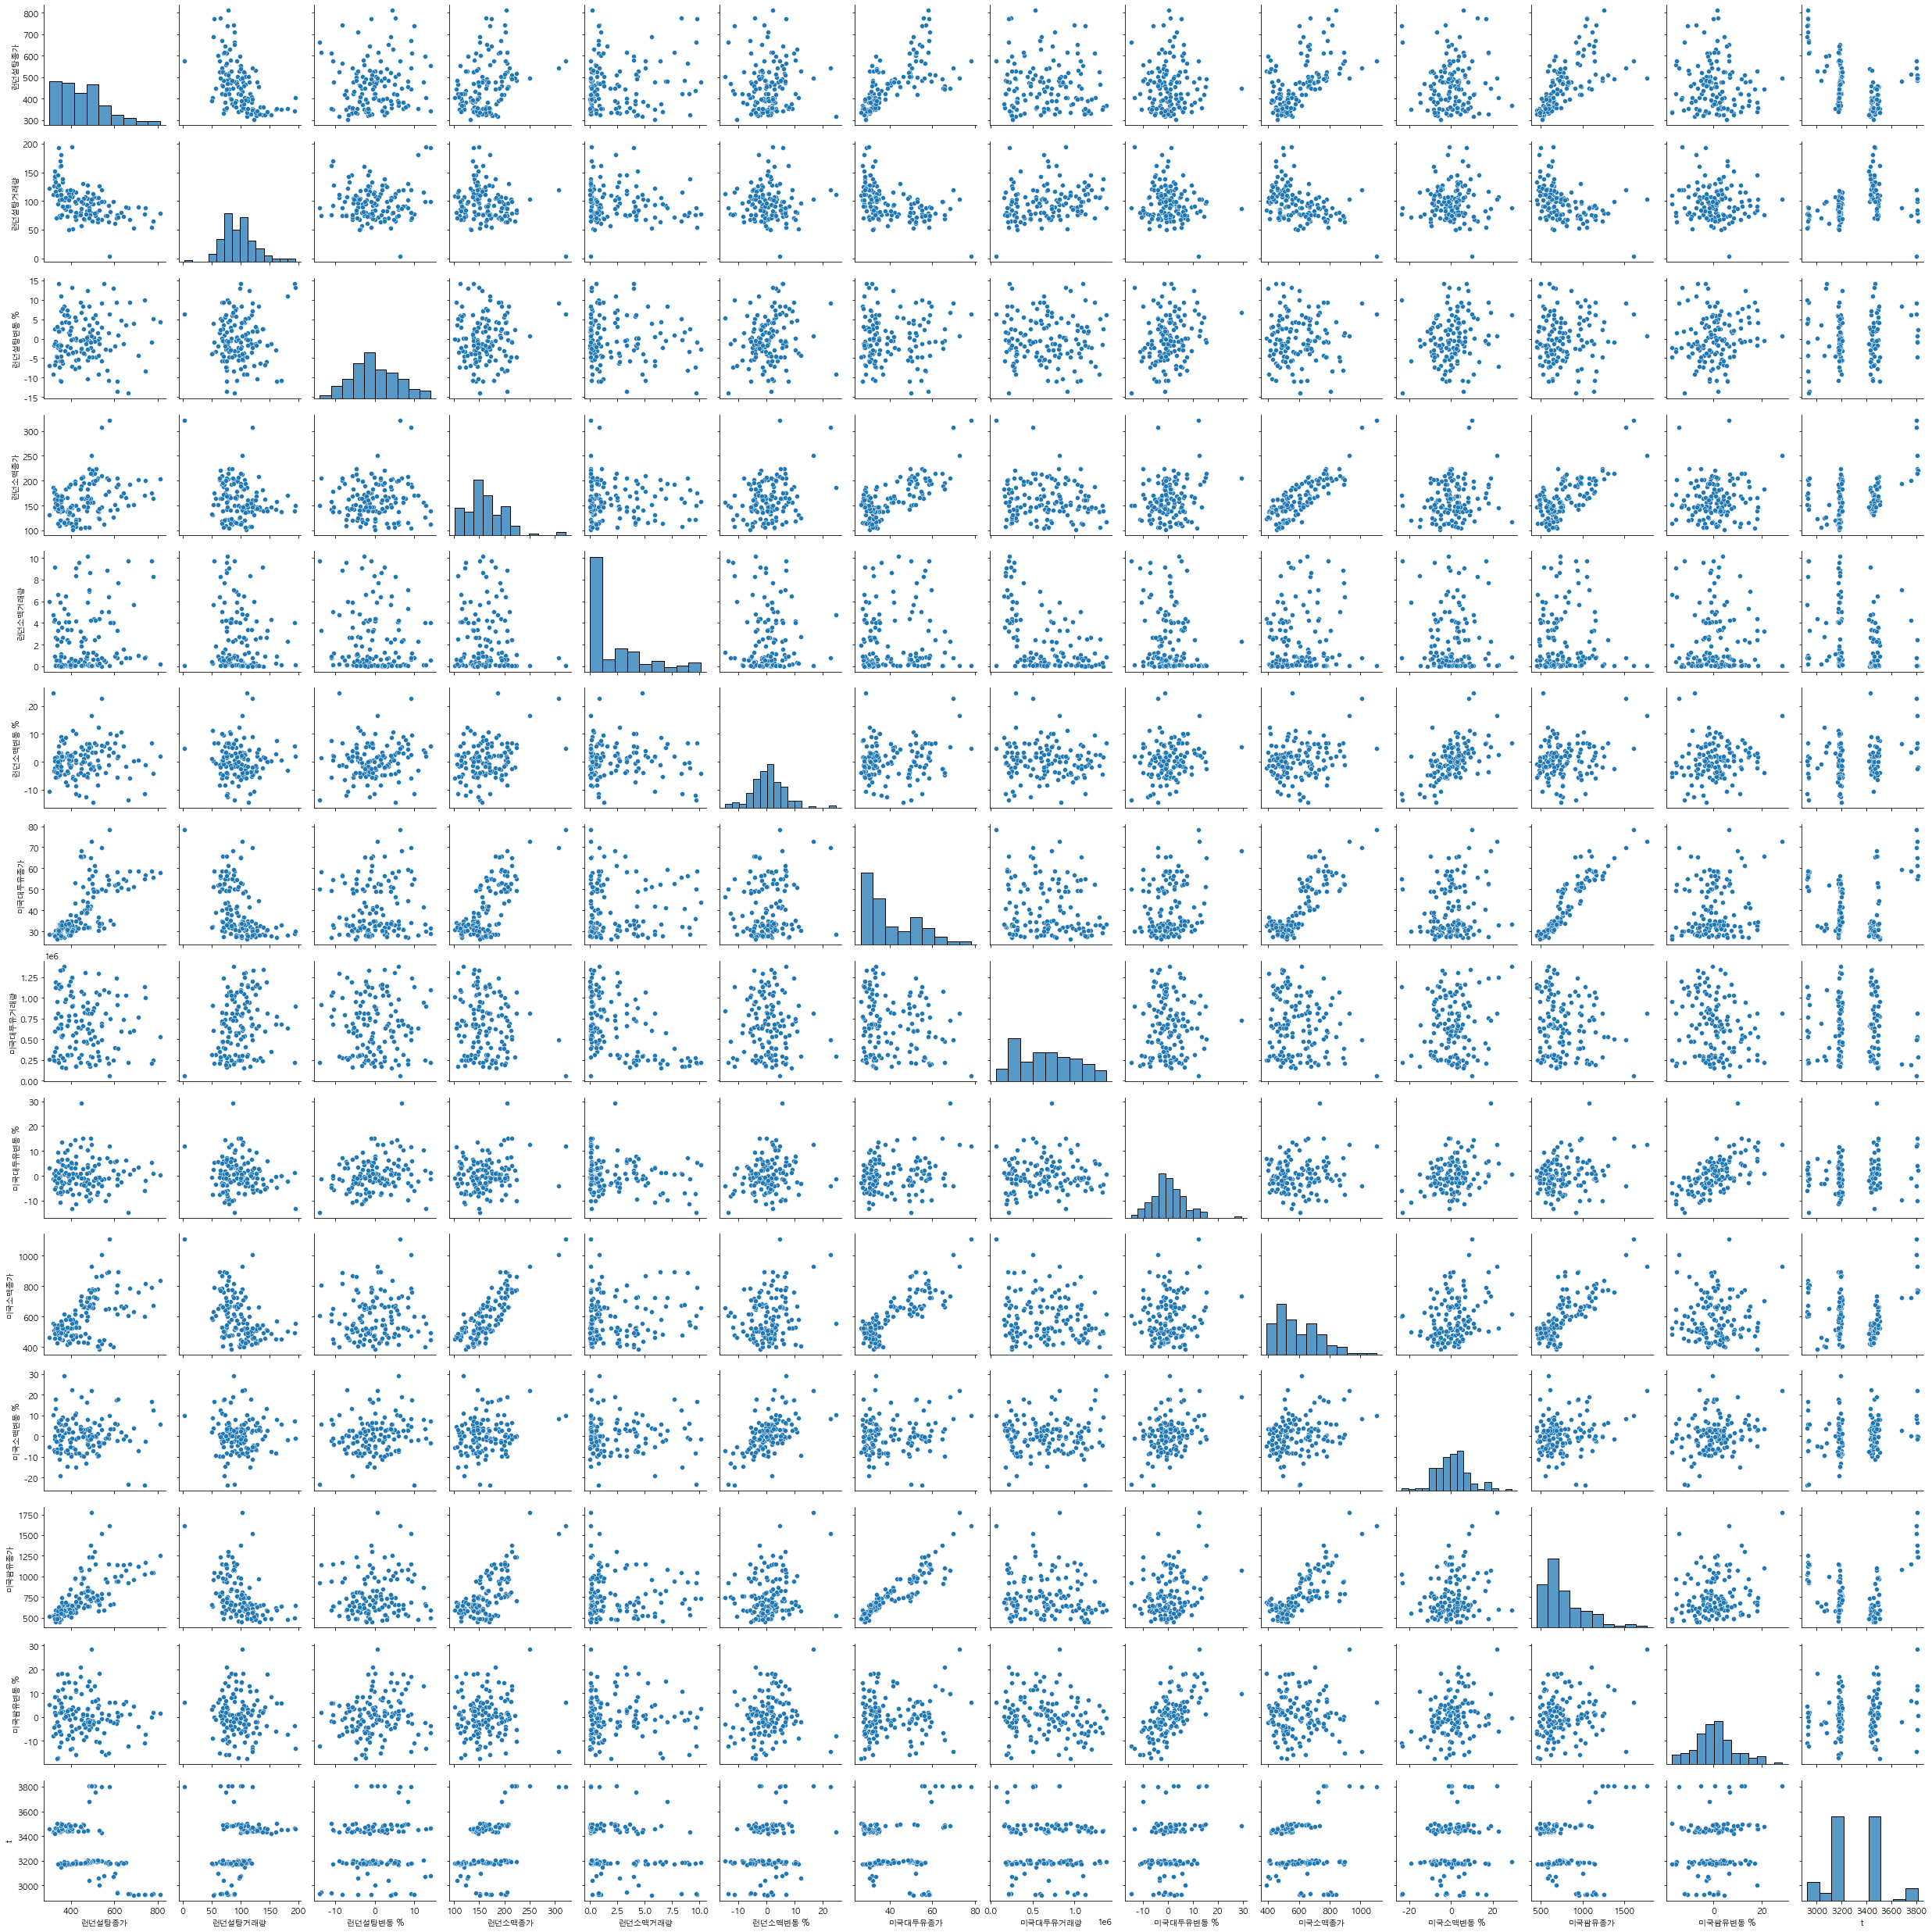

In [15]:
sns.pairplot(result)

### scaling하여서 변수 변화보기

In [16]:
from sklearn.preprocessing import MinMaxScaler

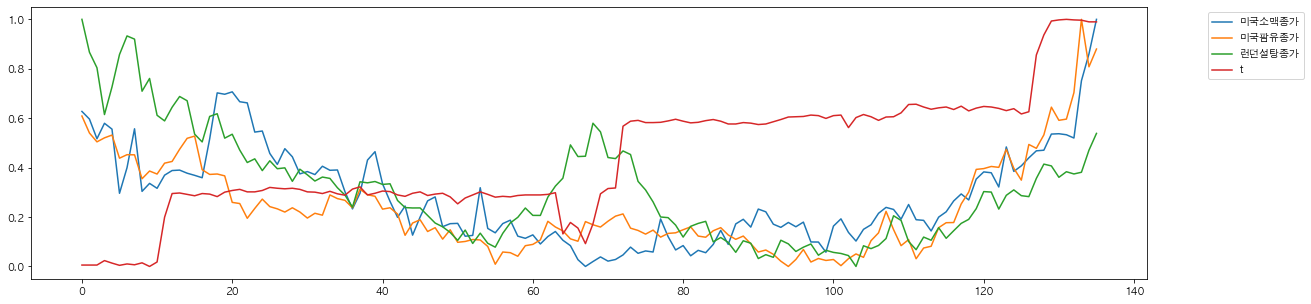

In [17]:
scaler2 = MinMaxScaler()
scaled = result.copy()
features2 = list(scaled)
scale_features2 = list(features2)
scale_features2.remove('날짜')
scaled[scale_features2] = scaler2.fit_transform(scaled[scale_features2])
scaled = pd.DataFrame(scaled)
scaled.index = scaled.index

scaled.columns = features2
scaled.loc[:,['미국소맥종가', '미국팜유종가', '런던설탕종가','t']].plot(figsize=(20,5))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

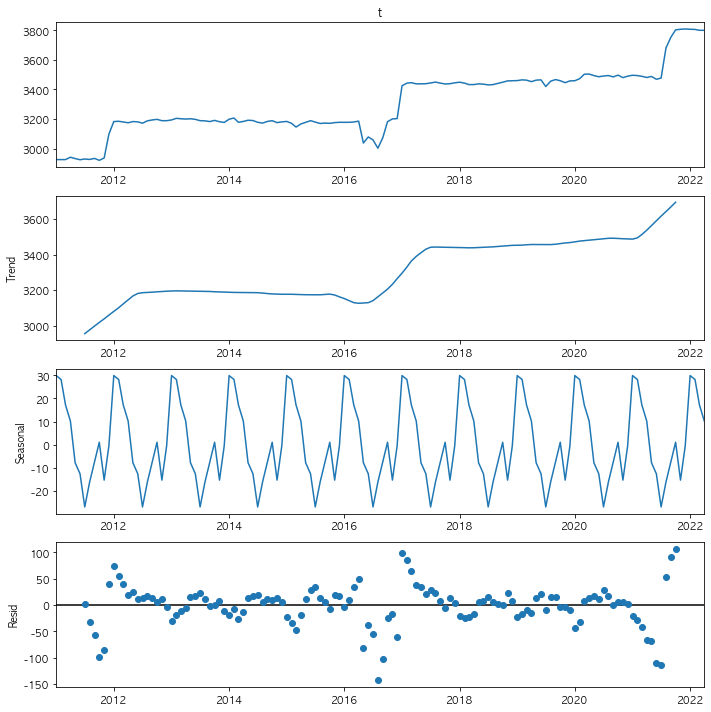

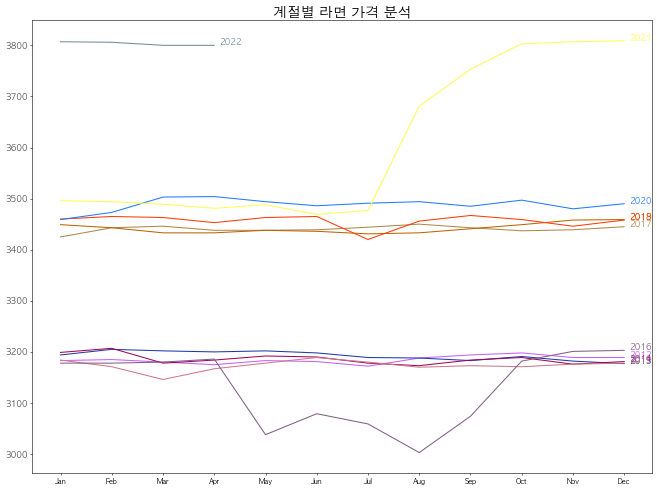

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_dt = result.copy()
result_dt.index = result_dt['날짜']
result_dt.drop(columns='날짜', axis=1, inplace=True)
sd = seasonal_decompose(result_dt['t'], model='additive')
plt.rcParams['figure.figsize'] = [10, 10]
sd.plot()
plt.show()

result_dt.reset_index(inplace=True)

result_dt['year'] = [d.year for d in result_dt['날짜']]
result_dt['month'] = [d.strftime('%b') for d in result_dt['날짜']]
years = result_dt['year'].unique()

np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

plt.figure(figsize=(16,12), dpi=50)
for i, y in enumerate(years):
    if i > 0:
        plt.plot('month', 't', data=result_dt[result_dt.year==y], color=mycolors[i], label=y)
        plt.text(result_dt[result_dt.year==y].shape[0]-0.9, result_dt.loc[result_dt.year==y, 't'][-1:].values[0], y, fontsize=12, color=mycolors[i])

plt.yticks(fontsize=12, alpha=.7)
plt.title("계절별 라면 가격 분석", fontsize=20)
plt.show()


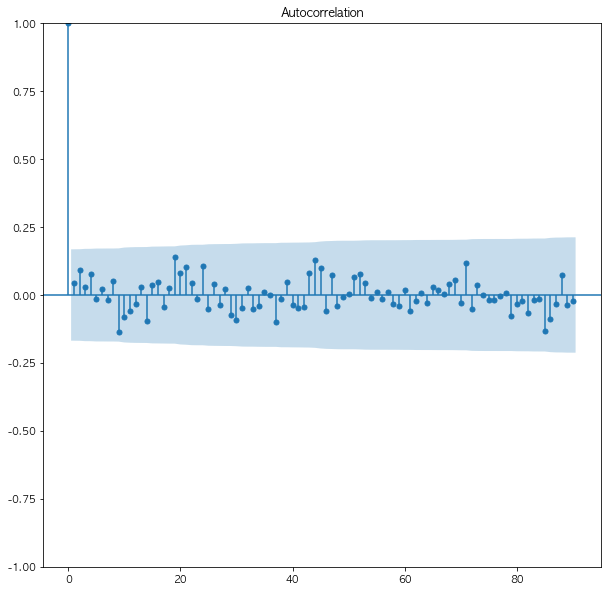

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(result['런던소맥변동 %'], lags=90)
plt.show()


# 모델링

In [20]:
mape_result= {}
rmse_result= {}

### 라이브러리 불러오기

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [22]:
def slidingwindow(data, feature, length, is_diff=False):
    df = data.copy()
    for i in range(1, length+1):
        df[feature+'-'+str(i)] = df[feature].shift(i)
        df[feature+'-'+str(i)] = df[feature+'-'+str(i)].astype('float64')
    
    if is_diff:
        df[feature+'1년증가량'] = df[feature+'-1']-df[feature+'-'+str(length)]
    
    return df

lagged_data = slidingwindow(result, 't', 1)
lagged_data.set_index('날짜', inplace=True)
lagged_data.index.freq='MS'

lagged_data['t+1'] = lagged_data['t'].shift(-1)

lagged_data.fillna(method='bfill', inplace=True)
lagged_data.fillna(method='ffill', inplace=True)

y = lagged_data['t+1']
x = lagged_data.drop(columns=['t+1'], axis=1)


x_train, x_test = x[:int(len(x)*(70/100))], x[int(len(x)*(70/100)):]
y_train, y_test = y[:int(len(y)*(70/100))], y[int(len(y)*(70/100)):]

## 홀트윈터스 예측

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(x_train['t'],
                                    trend='add', 
                                    seasonal='add',
                                    seasonal_periods=12
                                   ).fit()

In [24]:
hw_predictions = fitted_model.forecast(41)

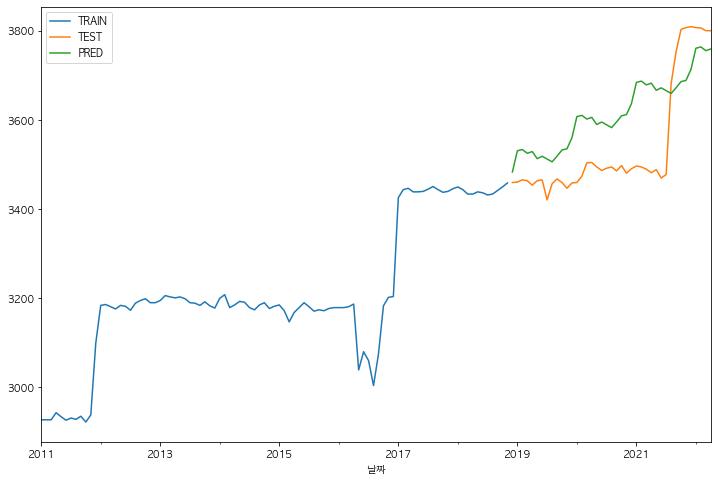

In [25]:
x_train['t'].plot(legend=True, label='TRAIN', figsize=(12, 8))
x_test['t'].plot(legend=True, label='TEST')
hw_predictions.plot(legend=True, label='PRED');

In [26]:
mape_result['Holt-Winters'] = mean_absolute_percentage_error(y_test, hw_predictions)
rmse_result['Holt-Winters'] = mean_squared_error(y_test, hw_predictions)**(0.5)

In [27]:
mape_result

{'Holt-Winters': 0.028378934439508077}

## AR 예측

In [28]:
from statsmodels.tsa import ar_model
from statsmodels.tsa.ar_model import AutoReg

In [29]:
search = ar_model.ar_select_order(endog=x_train['t'],maxlag=30, ic="aic",)
search.ar_lags

[1, 2, 3, 4, 5, 6, 7]

In [30]:
model = AutoReg(x_train['t'], lags=[1, 2, 3, 4, 5, 6, 7])
ARfit = model.fit()
print(ARfit.params)


const    166.849390
t.L1       1.096696
t.L2      -0.181853
t.L3       0.268025
t.L4      -0.173012
t.L5      -0.220350
t.L6       0.094386
t.L7       0.065925
dtype: float64


In [31]:
ar_predictions = ARfit.predict(len(x_train), len(x)-1)

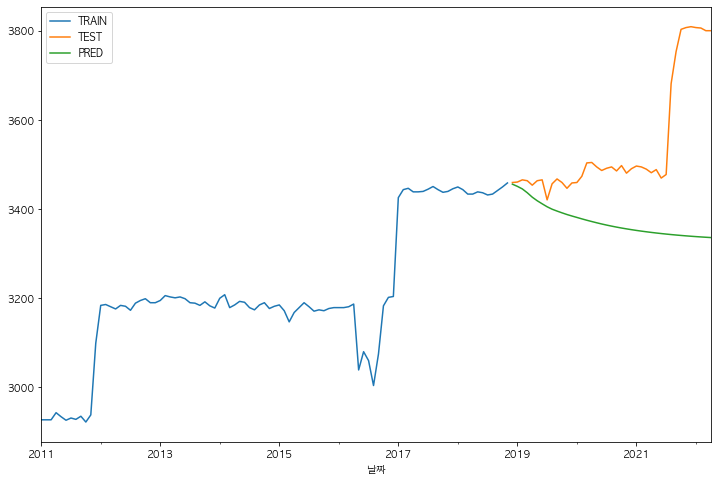

In [32]:
x_train['t'].plot(legend=True, label='TRAIN', figsize=(12, 8))
x_test['t'].plot(legend=True, label='TEST')
ar_predictions.plot(legend=True, label='PRED');

In [33]:
mape_result['AR'] = mean_absolute_percentage_error(y_test, ar_predictions)
rmse_result['AR'] = mean_squared_error(y_test, ar_predictions)**(0.5)

In [34]:
mape_result

{'Holt-Winters': 0.028378934439508077, 'AR': 0.048774179794562375}

## SARIMAX

In [35]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA


In [36]:
dtdata = result.set_index('날짜')
dtdata.index.freq='MS'

In [37]:
x_ex = dtdata
x_train_ex, x_test_ex = x_ex[:int(len(x_ex)*(70/100))], x_ex[int(len(x_ex)*(70/100)):]


In [38]:

temp = x_ex.drop('t', axis=1)


In [39]:
stepwise_fit = auto_arima(x_train_ex['t'], start_p = 0, start_q=0,start_d=0, exog=temp, max_p=6, max_q=6,max_d=6, seasonal=True, trace=True, error_action=None)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=950.800, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=951.304, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=950.970, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=950.947, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=950.388, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=952.301, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=952.302, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=952.047, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=952.851, Time=0.02 sec


/Users/joyeonglae/miniforge3/envs/tf_learn/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/joyeonglae/miniforge3/envs/tf_learn/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/joyeonglae/miniforge3/envs/tf_learn/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/joyeonglae/miniforge3/envs/tf_learn/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/joyeonglae/miniforge3/envs/tf_learn/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:190

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=950.329, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=950.581, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=950.940, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=952.098, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=952.110, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=951.897, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=952.694, Time=0.01 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=954.043, Time=0.02 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.395 seconds


/Users/joyeonglae/miniforge3/envs/tf_learn/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/joyeonglae/miniforge3/envs/tf_learn/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/joyeonglae/miniforge3/envs/tf_learn/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/joyeonglae/miniforge3/envs/tf_learn/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/joyeonglae/miniforge3/envs/tf_learn/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:190

In [40]:
x_train_ex['t-1'] = x_train['t-1']
x_test_ex['t-1'] = x_test['t-1']

<ipython-input-40-b4d31dff92b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_ex['t-1'] = x_train['t-1']
<ipython-input-40-b4d31dff92b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_ex['t-1'] = x_test['t-1']


In [41]:
# x_train_smx = result
exo = x_train_ex.drop(['t'], axis=1)
model = ARIMA(x_train_ex['t'],exog=exo, order=(1,1,1))
results = model.fit()
results.summary()

/Users/joyeonglae/miniforge3/envs/tf_learn/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/joyeonglae/miniforge3/envs/tf_learn/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/joyeonglae/miniforge3/envs/tf_learn/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      t   No. Observations:                   95
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -467.488
Date:                Tue, 10 May 2022   AIC                            968.977
Time:                        22:52:23   BIC                           1012.213
Sample:                    01-01-2011   HQIC                           986.441
                         - 11-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
런던설탕종가        -0.0826      0.231     -0.358      0.720      -0.534       0.369
런던설탕거래량        0.3324      0.373      0.890      0.373      -0.399       1.064
런던설탕변동 %       0.7800      0.826      0.945      0.345      -0.839       2.398
런던소맥종가         0.3459      1.236      0.280      0.780      -2.076       2.768
런던소맥거래량        0.5369      3.265      0.164      0.869      -5.863       6.937
런던소맥변동 %       0.8405      1.589      0.529      0.597      -2.274       3.955
미국대두유종가       -1.2498      5.349     -0.234      0.815     -11.733       9.234
미국대두유거래량    7.588e-06   1.36e-05      0.559      0.576    -1.9e-05    3.42e-05
미국대두유변동 %      0.5316      1.767      0.301      0.763      -2.931       3.994
미국소맥종가        -0.0144      0.330     -0.044      0.965      -0.661       0.632
미국소맥변동 %      -0.2930      1.237     -0.237      0.813      -2.718       2.132
미국팜유종가         0.0983      0.250      0.393      0.694      -0.392       0.589
미국팜유변동 %      -0.6084      1.459     -0.417      0.677      -3.468       2.251
t-1            0.1559      0.906      0.172      0.863      -1.620       1.932
ar.L1              -0      0.503         -0      1.000      -0.986       0.986
ma.L1               0      0.503          0      1.000      -0.986       0.986
sigma2      1217.5616    176.342      6.905      0.000     871.938    1563.185
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               745.77
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               2.63   Skew:                             2.20
Prob(H) (two-sided):                  0.01   Kurtosis:                        16.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.27e+20. Standard errors may be unstable.
"""

In [42]:
x_train_ex

,런던설탕종가,런던설탕거래량,런던설탕변동 %,런던소맥종가,런던소맥거래량,런던소맥변동 %,미국대두유종가,미국대두유거래량,미국대두유변동 %,미국소맥종가,미국소맥변동 %,미국팜유종가,미국팜유변동 %,t,t-1
날짜,,,,,,,,,,,,,,,
2011-01-01,811.6,78.07,4.39,203.10,0.18,2.06,57.88,532790.0,0.24,838.63,5.80,1255.25,1.56,2926.0,2926.0
2011-02-01,743.8,87.75,-8.35,201.00,0.87,-1.03,56.77,1000000.0,-1.92,816.38,-2.65,1164.00,-7.27,2926.0,2926.0
2011-03-01,711.7,89.26,-4.32,202.00,1.01,0.50,58.78,763570.0,3.54,759.13,-7.01,1116.50,-4.08,2926.0,2926.0
2011-04-01,615.1,74.98,-13.57,205.00,3.30,1.49,58.13,914890.0,-1.11,804.13,5.93,1138.00,1.93,2942.0,2926.0
2011-05-01,672.0,67.93,9.25,193.00,0.75,-5.85,58.49,583590.0,0.62,787.13,-2.11,1153.00,1.32,2933.0,2942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-01,317.9,111.06,-9.04,186.35,4.77,24.65,28.73,295550.0,-1.34,554.50,10.46,524.50,-7.86,3431.0,3436.0
2018-08-01,325.9,138.16,2.52,182.15,9.14,-2.25,28.37,241480.0,-1.25,546.50,-1.44,535.25,2.05,3433.0,3431.0
2018-09-01,320.5,126.37,-1.66,176.15,4.20,-3.29,28.68,248370.0,1.09,510.50,-6.59,512.25,-4.30,3441.0,3433.0


In [43]:
exo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95 entries, 2011-01-01 to 2018-11-01
Freq: MS
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   런던설탕종가     95 non-null     float64
 1   런던설탕거래량    95 non-null     float64
 2   런던설탕변동 %   95 non-null     float64
 3   런던소맥종가     95 non-null     float64
 4   런던소맥거래량    95 non-null     float64
 5   런던소맥변동 %   95 non-null     float64
 6   미국대두유종가    95 non-null     float64
 7   미국대두유거래량   95 non-null     float64
 8   미국대두유변동 %  95 non-null     float64
 9   미국소맥종가     95 non-null     float64
 10  미국소맥변동 %   95 non-null     float64
 11  미국팜유종가     95 non-null     float64
 12  미국팜유변동 %   95 non-null     float64
 13  t-1        95 non-null     float64
dtypes: float64(14)
memory usage: 11.1 KB


In [44]:
exo_test = x_test_ex.drop(['t'], axis=1)
sarimax_predictions = results.predict(start=len(x_train_ex), end=len(x_train_ex)+len(x_test_ex)-1, exog=exo_test, dynamic=False, typ='levels').rename('SARIMA(1,1,1) Predictions')

In [45]:
x_test.index = sarimax_predictions.index

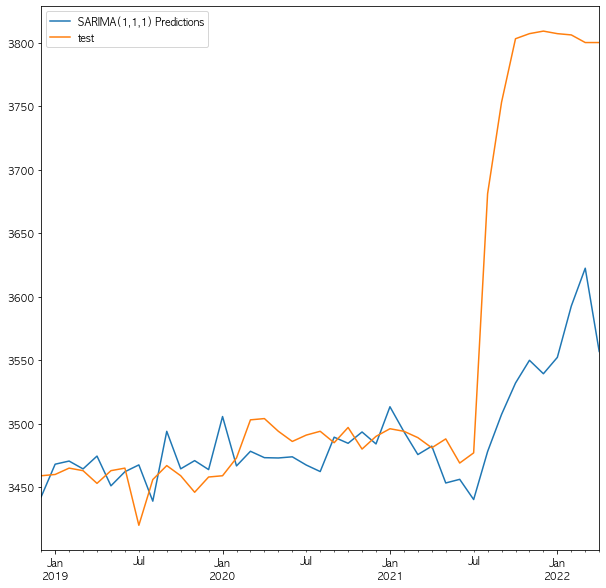

In [46]:
# ax = x_train['t'].plot(legend=True,figsize=(12,6), label='train')
sarimax_predictions.plot(legend=True)
x_test['t'].plot(legend=True, label='test');

In [47]:
mape_result['SARIMAX'] = mean_absolute_percentage_error(y_test, sarimax_predictions)
rmse_result['SARIMAX'] = mean_squared_error(y_test, sarimax_predictions)**(0.5)

In [48]:
mape_result

{'Holt-Winters': 0.028378934439508077,
 'AR': 0.048774179794562375,
 'SARIMAX': 0.01966831892076289}

## 선형회귀

### t+1, t-1, t-2 만들기

#### 다른 피쳐들도..

In [49]:

# lagged_data = slidingwindow(result, 't', 2)
# lagged_data.set_index('날짜', inplace=True)
t_data = result.copy()
t_data.set_index('날짜', inplace=True)
t_data['t+1'] = t_data['t'].shift(-1)

t_data.fillna(method='bfill', inplace=True)
t_data.fillna(method='ffill', inplace=True)

In [50]:
y

날짜
2011-01-01    2926.0
2011-02-01    2926.0
2011-03-01    2942.0
2011-04-01    2933.0
2011-05-01    2925.0
               ...  
2021-12-01    3807.0
2022-01-01    3806.0
2022-02-01    3800.0
2022-03-01    3800.0
2022-04-01    3800.0
Freq: MS, Name: t+1, Length: 136, dtype: float64

In [51]:
x = t_data[['t']]
y = t_data[['t+1']]

x_train, x_test = x.iloc[:int(len(x)*70/100)], x.iloc[int(len(x)*70/100):]
y_train, y_test = y.iloc[:int(len(y)*70/100)], y.iloc[int(len(y)*70/100):]
model = LinearRegression()

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

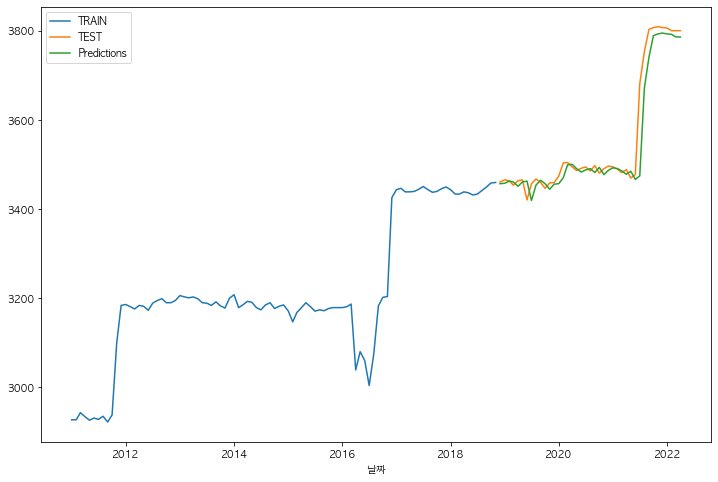

In [52]:
# y_pred2 = lr_model.predict(scaler.transform(x))
y_pred = pd.DataFrame(y_pred)
y_pred.index = y.iloc[int(len(y)*70/100):].index
y_train = pd.DataFrame(y_train)
y_train.index = x.iloc[:int(len(x)*70/100)].index
y_test = pd.DataFrame(y_test)
y_test.index  =y.iloc[int(len(x)*70/100):].index
plt.figure(figsize=(12, 8))
plt.plot(y_train, label="TRAIN")
plt.plot(y_test, label="TEST")
plt.plot(y_pred, label="Predictions")
plt.legend()
plt.xlabel("날짜")
plt.show()

In [53]:
print(mean_absolute_percentage_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred)**(0.5))

0.005345375000064282
38.81382618435161


In [54]:
x

,t
날짜,
2011-01-01,2926.0
2011-02-01,2926.0
2011-03-01,2926.0
2011-04-01,2942.0
2011-05-01,2933.0
...,...
2021-12-01,3809.0
2022-01-01,3807.0
2022-02-01,3806.0


## 종가 feature_lag

In [55]:
lagg_features = ['런던설탕종가', '런던소맥종가', '미국대두유종가', '미국소맥종가', '미국팜유종가']
feature_lag12 = lagged_data.copy()
feature_lag7_slidingx = lagged_data.copy()

for feature in lagg_features:
    feature_lag12 = slidingwindow(feature_lag12, feature, 12, is_diff=True)

list(feature_lag12)

['런던설탕종가',
 '런던설탕거래량',
 '런던설탕변동 %',
 '런던소맥종가',
 '런던소맥거래량',
 '런던소맥변동 %',
 '미국대두유종가',
 '미국대두유거래량',
 '미국대두유변동 %',
 '미국소맥종가',
 '미국소맥변동 %',
 '미국팜유종가',
 '미국팜유변동 %',
 't',
 't-1',
 't+1',
 '런던설탕종가-1',
 '런던설탕종가-2',
 '런던설탕종가-3',
 '런던설탕종가-4',
 '런던설탕종가-5',
 '런던설탕종가-6',
 '런던설탕종가-7',
 '런던설탕종가-8',
 '런던설탕종가-9',
 '런던설탕종가-10',
 '런던설탕종가-11',
 '런던설탕종가-12',
 '런던설탕종가1년증가량',
 '런던소맥종가-1',
 '런던소맥종가-2',
 '런던소맥종가-3',
 '런던소맥종가-4',
 '런던소맥종가-5',
 '런던소맥종가-6',
 '런던소맥종가-7',
 '런던소맥종가-8',
 '런던소맥종가-9',
 '런던소맥종가-10',
 '런던소맥종가-11',
 '런던소맥종가-12',
 '런던소맥종가1년증가량',
 '미국대두유종가-1',
 '미국대두유종가-2',
 '미국대두유종가-3',
 '미국대두유종가-4',
 '미국대두유종가-5',
 '미국대두유종가-6',
 '미국대두유종가-7',
 '미국대두유종가-8',
 '미국대두유종가-9',
 '미국대두유종가-10',
 '미국대두유종가-11',
 '미국대두유종가-12',
 '미국대두유종가1년증가량',
 '미국소맥종가-1',
 '미국소맥종가-2',
 '미국소맥종가-3',
 '미국소맥종가-4',
 '미국소맥종가-5',
 '미국소맥종가-6',
 '미국소맥종가-7',
 '미국소맥종가-8',
 '미국소맥종가-9',
 '미국소맥종가-10',
 '미국소맥종가-11',
 '미국소맥종가-12',
 '미국소맥종가1년증가량',
 '미국팜유종가-1',
 '미국팜유종가-2',
 '미국팜유종가-3',
 '미국팜유종가-4',
 '미국팜유종가-5',
 '미국팜유종가-6',
 '미국팜유종가-7',
 '미국팜유종가-8',
 '

In [56]:
feature_lag12.fillna(method='bfill', inplace=True)
feature_lag12.fillna(method='ffill', inplace=True)

In [57]:
x_train

array([[2926.],
       [2926.],
       [2926.],
       [2942.],
       [2933.],
       [2925.],
       [2930.],
       [2927.],
       [2934.],
       [2921.],
       [2937.],
       [3098.],
       [3183.],
       [3185.],
       [3180.],
       [3175.],
       [3183.],
       [3181.],
       [3172.],
       [3188.],
       [3194.],
       [3198.],
       [3189.],
       [3189.],
       [3194.],
       [3205.],
       [3202.],
       [3200.],
       [3202.],
       [3198.],
       [3189.],
       [3188.],
       [3183.],
       [3191.],
       [3182.],
       [3177.],
       [3199.],
       [3207.],
       [3178.],
       [3184.],
       [3192.],
       [3190.],
       [3178.],
       [3173.],
       [3184.],
       [3189.],
       [3176.],
       [3181.],
       [3184.],
       [3171.],
       [3146.],
       [3167.],
       [3178.],
       [3189.],
       [3180.],
       [3170.],
       [3173.],
       [3171.],
       [3176.],
       [3178.],
       [3178.],
       [3178.],
       [

In [58]:
y = feature_lag12['t+1']
x = feature_lag12.drop(columns=['t+1'], axis=1)


# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train, x_test = x[:int(len(x)*(70/100))], x[int(len(x)*(70/100)):]
y_train, y_test = y[:int(len(y)*(70/100))], y[int(len(y)*(70/100)):]

In [59]:
x_train

,런던설탕종가,런던설탕거래량,런던설탕변동 %,런던소맥종가,런던소맥거래량,런던소맥변동 %,미국대두유종가,미국대두유거래량,미국대두유변동 %,미국소맥종가,...,미국팜유종가-4,미국팜유종가-5,미국팜유종가-6,미국팜유종가-7,미국팜유종가-8,미국팜유종가-9,미국팜유종가-10,미국팜유종가-11,미국팜유종가-12,미국팜유종가1년증가량
날짜,,,,,,,,,,,,,,,,,,,,,
2011-01-01,811.6,78.07,4.39,203.10,0.18,2.06,57.88,532790.0,0.24,838.63,...,1255.25,1255.25,1255.25,1255.25,1255.25,1255.25,1255.25,1255.25,1255.25,-253.25
2011-02-01,743.8,87.75,-8.35,201.00,0.87,-1.03,56.77,1000000.0,-1.92,816.38,...,1255.25,1255.25,1255.25,1255.25,1255.25,1255.25,1255.25,1255.25,1255.25,-253.25
2011-03-01,711.7,89.26,-4.32,202.00,1.01,0.50,58.78,763570.0,3.54,759.13,...,1255.25,1255.25,1255.25,1255.25,1255.25,1255.25,1255.25,1255.25,1255.25,-253.25
2011-04-01,615.1,74.98,-13.57,205.00,3.30,1.49,58.13,914890.0,-1.11,804.13,...,1255.25,1255.25,1255.25,1255.25,1255.25,1255.25,1255.25,1255.25,1255.25,-253.25
2011-05-01,672.0,67.93,9.25,193.00,0.75,-5.85,58.49,583590.0,0.62,787.13,...,1255.25,1255.25,1255.25,1255.25,1255.25,1255.25,1255.25,1255.25,1255.25,-253.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-01,317.9,111.06,-9.04,186.35,4.77,24.65,28.73,295550.0,-1.34,554.50,...,616.25,655.50,638.75,604.00,610.25,659.75,644.25,627.75,624.50,-55.25
2018-08-01,325.9,138.16,2.52,182.15,9.14,-2.25,28.37,241480.0,-1.25,546.50,...,592.75,616.25,655.50,638.75,604.00,610.25,659.75,644.25,627.75,-103.25
2018-09-01,320.5,126.37,-1.66,176.15,4.20,-3.29,28.68,248370.0,1.09,510.50,...,610.25,592.75,616.25,655.50,638.75,604.00,610.25,659.75,644.25,-109.00


In [60]:

features = list(x_train)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

x_train.columns = features
x_test.columns= features

### lag 있을 때

In [61]:
list(x_test)

['런던설탕종가',
 '런던설탕거래량',
 '런던설탕변동 %',
 '런던소맥종가',
 '런던소맥거래량',
 '런던소맥변동 %',
 '미국대두유종가',
 '미국대두유거래량',
 '미국대두유변동 %',
 '미국소맥종가',
 '미국소맥변동 %',
 '미국팜유종가',
 '미국팜유변동 %',
 't',
 't-1',
 '런던설탕종가-1',
 '런던설탕종가-2',
 '런던설탕종가-3',
 '런던설탕종가-4',
 '런던설탕종가-5',
 '런던설탕종가-6',
 '런던설탕종가-7',
 '런던설탕종가-8',
 '런던설탕종가-9',
 '런던설탕종가-10',
 '런던설탕종가-11',
 '런던설탕종가-12',
 '런던설탕종가1년증가량',
 '런던소맥종가-1',
 '런던소맥종가-2',
 '런던소맥종가-3',
 '런던소맥종가-4',
 '런던소맥종가-5',
 '런던소맥종가-6',
 '런던소맥종가-7',
 '런던소맥종가-8',
 '런던소맥종가-9',
 '런던소맥종가-10',
 '런던소맥종가-11',
 '런던소맥종가-12',
 '런던소맥종가1년증가량',
 '미국대두유종가-1',
 '미국대두유종가-2',
 '미국대두유종가-3',
 '미국대두유종가-4',
 '미국대두유종가-5',
 '미국대두유종가-6',
 '미국대두유종가-7',
 '미국대두유종가-8',
 '미국대두유종가-9',
 '미국대두유종가-10',
 '미국대두유종가-11',
 '미국대두유종가-12',
 '미국대두유종가1년증가량',
 '미국소맥종가-1',
 '미국소맥종가-2',
 '미국소맥종가-3',
 '미국소맥종가-4',
 '미국소맥종가-5',
 '미국소맥종가-6',
 '미국소맥종가-7',
 '미국소맥종가-8',
 '미국소맥종가-9',
 '미국소맥종가-10',
 '미국소맥종가-11',
 '미국소맥종가-12',
 '미국소맥종가1년증가량',
 '미국팜유종가-1',
 '미국팜유종가-2',
 '미국팜유종가-3',
 '미국팜유종가-4',
 '미국팜유종가-5',
 '미국팜유종가-6',
 '미국팜유종가-7',
 '미국팜유종가-8',
 '미국팜유종가-9

In [62]:
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)
y_pred_lr_lag2 = lr_model.predict(x_test)

In [63]:
y_pred_lr_lag2 = pd.DataFrame(y_pred_lr_lag2)
y_test = pd.DataFrame(y_test)
y_pred_lr_lag2.index = result['날짜'][int(len(x)*(70/100)):]
y_test.index = result['날짜'][int(len(x)*(70/100)):]

### 테스트셋 시각화

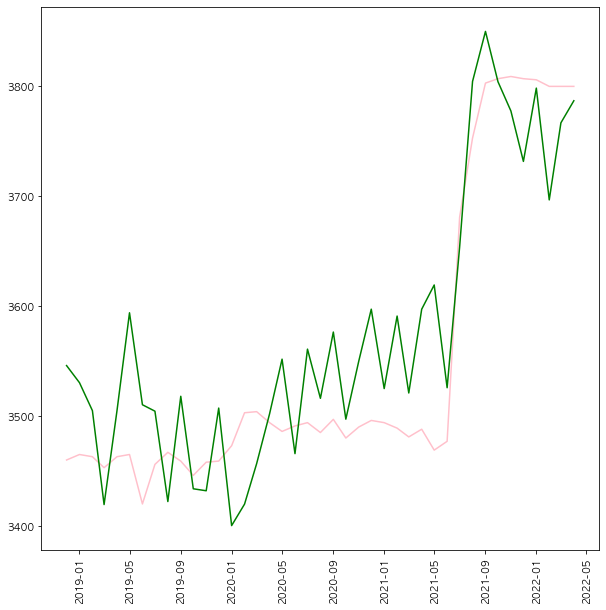

In [64]:
plt.plot(y_test, color='pink')
plt.plot(y_pred_lr_lag2, color='green')
plt.xticks(rotation = 90)
plt.show()

In [65]:
mape_result['Linear_lag2_12'] = mean_absolute_percentage_error(y_test, y_pred_lr_lag2)
rmse_result['Linear_lag2_12'] = mean_squared_error(y_test, y_pred_lr_lag2)**(0.5)

In [66]:
print("MAPE : ", mape_result)
print("RMSE : ", rmse_result)

MAPE :  {'Holt-Winters': 0.028378934439508077, 'AR': 0.048774179794562375, 'SARIMAX': 0.01966831892076289, 'Linear_lag2_12': 0.015620843993905011}
RMSE :  {'Holt-Winters': 111.98361535822303, 'AR': 239.4483163554718, 'SARIMAX': 125.4662766076435, 'Linear_lag2_12': 64.6830680201147}


### 훈련셋 + 테스트셋 시각화

/Users/joyeonglae/miniforge3/envs/tf_learn/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


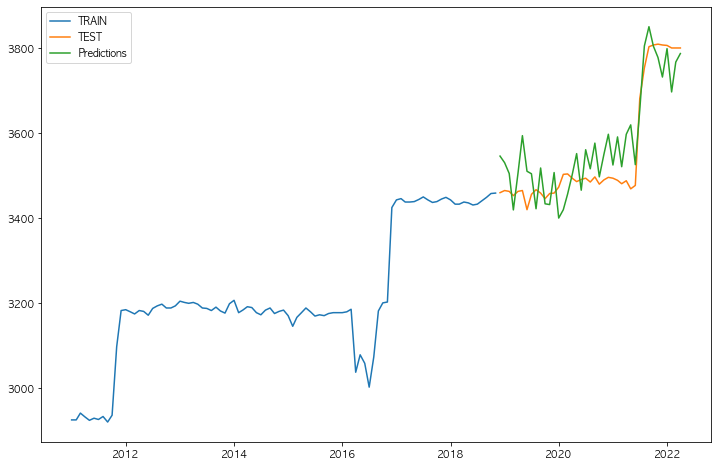

In [69]:
y_pred2 = lr_model.predict(scaler.transform(x))
y_pred2 = pd.DataFrame(y_pred2)
y_pred2.index = y.index
plt.figure(figsize=(12, 8))
plt.plot(y_train, label="TRAIN")
plt.plot(y_test, label="TEST")
plt.plot(y_pred_lr_lag2, label="Predictions")
plt.legend()
plt.show()

In [70]:
coef = list(zip(lr_model.coef_, list(x_train)))
coef.sort(reverse=True)
cnt = 0
for ele in coef:
    print(ele)
    cnt += 1
    if cnt == 10:
        break

(1310.8757185921024, '런던소맥종가')
(748.191473054971, '미국대두유종가-12')
(596.0057613090213, '런던설탕종가-1')
(500.6967198876167, '미국대두유종가1년증가량')
(445.82278181466995, '미국대두유종가-3')
(393.6559021600182, '미국소맥종가-1')
(301.1200896881861, '미국소맥변동 %')
(299.7959007831176, 't')
(288.5483948063592, '런던소맥종가-2')
(255.15691133343745, '미국대두유종가-9')


In [71]:
x_train

,런던설탕종가,런던설탕거래량,런던설탕변동 %,런던소맥종가,런던소맥거래량,런던소맥변동 %,미국대두유종가,미국대두유거래량,미국대두유변동 %,미국소맥종가,...,미국팜유종가-4,미국팜유종가-5,미국팜유종가-6,미국팜유종가-7,미국팜유종가-8,미국팜유종가-9,미국팜유종가-10,미국팜유종가-11,미국팜유종가-12,미국팜유종가1년증가량
0,1.000000,0.215046,0.651510,0.830807,0.015826,0.425629,0.971591,0.297283,0.566174,0.887824,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.248422
1,0.862670,0.289206,0.198934,0.813601,0.084075,0.347063,0.936553,0.684809,0.484262,0.844036,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.248422
2,0.797650,0.300774,0.342096,0.821794,0.097923,0.385965,1.000000,0.488703,0.691316,0.731368,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.248422
3,0.601985,0.191374,0.013499,0.846374,0.324431,0.411137,0.979482,0.614215,0.514979,0.819928,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.248422
4,0.717237,0.137363,0.824156,0.748054,0.072206,0.224511,0.990846,0.339419,0.580584,0.786472,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.248422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.000000,0.467785,0.174423,0.693568,0.469832,1.000000,0.051452,0.100504,0.506257,0.328656,...,0.197488,0.246782,0.225746,0.182104,0.189953,0.252119,0.232653,0.211931,0.207849,0.605500
91,0.016204,0.675400,0.585080,0.659156,0.902077,0.316044,0.040088,0.055656,0.509670,0.312912,...,0.167975,0.197488,0.246782,0.225746,0.182104,0.189953,0.252119,0.232653,0.211931,0.518936
92,0.005266,0.585076,0.436590,0.609996,0.413452,0.289601,0.049874,0.061371,0.598407,0.242064,...,0.189953,0.167975,0.197488,0.246782,0.225746,0.182104,0.189953,0.252119,0.232653,0.508566
93,0.076565,1.000000,0.885613,0.567800,0.227498,0.299008,0.029040,0.383595,0.469852,0.223860,...,0.138462,0.189953,0.167975,0.197488,0.246782,0.225746,0.182104,0.189953,0.252119,0.439134


### 원자재 가격을 t-7만 넣었을 때(근거 : grangercasuality test)

In [72]:
lagg_features = ['런던설탕종가', '런던소맥종가', '미국대두유종가', '미국소맥종가', '미국팜유종가']
feature_lag7_slidingx = lagged_data.copy()

for feature in lagg_features:
    feature_lag7_slidingx[feature+'-7'] = feature_lag7_slidingx[feature].shift(7)
    feature_lag7_slidingx[feature+'1년증가량'] = feature_lag7_slidingx[feature]-feature_lag7_slidingx[feature+'-'+str(7)]


In [73]:
feature_lag7_slidingx.fillna(method='bfill', inplace=True)
feature_lag7_slidingx.fillna(method='ffill', inplace=True)

In [74]:
y = feature_lag7_slidingx['t+1']
x = feature_lag7_slidingx.drop(columns=['t+1'], axis=1)


# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train, x_test = x[:int(len(x)*(70/100))], x[int(len(x)*(70/100)):]
y_train, y_test = y[:int(len(y)*(70/100))], y[int(len(y)*(70/100)):]

In [75]:
features = list(x_train)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

x_train.columns = features
x_test.columns= features

In [76]:
list(x_test)

['런던설탕종가',
 '런던설탕거래량',
 '런던설탕변동 %',
 '런던소맥종가',
 '런던소맥거래량',
 '런던소맥변동 %',
 '미국대두유종가',
 '미국대두유거래량',
 '미국대두유변동 %',
 '미국소맥종가',
 '미국소맥변동 %',
 '미국팜유종가',
 '미국팜유변동 %',
 't',
 't-1',
 '런던설탕종가-7',
 '런던설탕종가1년증가량',
 '런던소맥종가-7',
 '런던소맥종가1년증가량',
 '미국대두유종가-7',
 '미국대두유종가1년증가량',
 '미국소맥종가-7',
 '미국소맥종가1년증가량',
 '미국팜유종가-7',
 '미국팜유종가1년증가량']

In [77]:
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)
y_pred_lr_lag2 = lr_model.predict(x_test)

In [78]:
y_pred_lr_lag2 = pd.DataFrame(y_pred_lr_lag2)
y_test = pd.DataFrame(y_test)
y_pred_lr_lag2.index = result['날짜'][int(len(x)*(70/100)):]
y_test.index = result['날짜'][int(len(x)*(70/100)):]

### 테스트셋 시각화

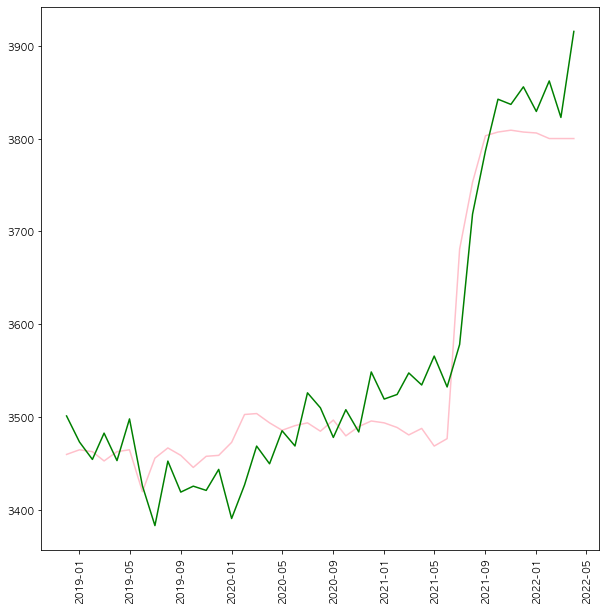

In [79]:
plt.plot(y_test, color='pink')
plt.plot(y_pred_lr_lag2, color='green')
plt.xticks(rotation = 90)
plt.show()

In [80]:
mape_result['lr_lag2_only7'] = mean_absolute_percentage_error(y_test, y_pred_lr_lag2)
rmse_result['lr_lag2_only7'] = mean_squared_error(y_test, y_pred_lr_lag2)**(0.5)

In [81]:
print("MAPE : ", mape_result)
print("RMSE : ", rmse_result)

MAPE :  {'Holt-Winters': 0.028378934439508077, 'AR': 0.048774179794562375, 'SARIMAX': 0.01966831892076289, 'Linear_lag2_12': 0.015620843993905011, 'lr_lag2_only7': 0.010763668101713012}
RMSE :  {'Holt-Winters': 111.98361535822303, 'AR': 239.4483163554718, 'SARIMAX': 125.4662766076435, 'Linear_lag2_12': 64.6830680201147, 'lr_lag2_only7': 46.94230037271328}


### 훈련셋 + 테스트셋 시각화

/Users/joyeonglae/miniforge3/envs/tf_learn/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


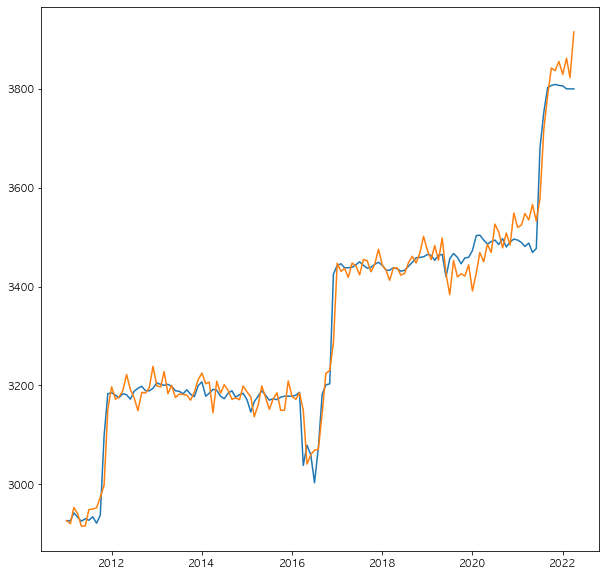

In [82]:
y_pred2 = lr_model.predict(scaler.transform(x))
y_pred2 = pd.DataFrame(y_pred2)
y_pred2.index = y.index
plt.plot(y)
plt.plot(y_pred2)
plt.show()

In [83]:
coef = list(zip(lr_model.coef_, list(x_train)))
coef.sort(reverse=True)
cnt = 0
for ele in coef:
    print(ele)
    cnt += 1
    if cnt == 10:
        break

(668.7138612753173, '미국팜유종가-7')
(521.8472036499828, '런던소맥종가')
(502.3788703846717, 't')
(499.10265727892266, '미국팜유종가1년증가량')
(212.01002561759572, '런던설탕종가')
(122.51410514550135, '미국소맥변동 %')
(100.3955514147044, '미국대두유종가')
(12.009951076932643, '미국팜유변동 %')
(-0.4809275996750616, '런던설탕변동 %')
(-24.023598350208463, '미국대두유종가1년증가량')


## 원자재 가격을 t-10만 했을 때

In [84]:
lagg_features = ['런던설탕종가', '런던소맥종가', '미국대두유종가', '미국소맥종가', '미국팜유종가']
feature_lag10_slidingx = lagged_data.copy()

for feature in lagg_features:
    feature_lag10_slidingx[feature+'-10'] = feature_lag10_slidingx[feature].shift(10)
    feature_lag10_slidingx[feature+'10개월증가량'] = feature_lag10_slidingx[feature]-feature_lag10_slidingx[feature+'-'+str(10)]


In [85]:
feature_lag10_slidingx.fillna(method='bfill', inplace=True)
feature_lag10_slidingx.fillna(method='ffill', inplace=True)

In [86]:
y = feature_lag10_slidingx['t+1']
x = feature_lag10_slidingx.drop(columns=['t+1'], axis=1)


# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train, x_test = x[:int(len(x)*(70/100))], x[int(len(x)*(70/100)):]
y_train, y_test = y[:int(len(y)*(70/100))], y[int(len(y)*(70/100)):]

In [87]:
features = list(x_train)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

x_train.columns = features
x_test.columns= features

In [88]:
list(x_test)

['런던설탕종가',
 '런던설탕거래량',
 '런던설탕변동 %',
 '런던소맥종가',
 '런던소맥거래량',
 '런던소맥변동 %',
 '미국대두유종가',
 '미국대두유거래량',
 '미국대두유변동 %',
 '미국소맥종가',
 '미국소맥변동 %',
 '미국팜유종가',
 '미국팜유변동 %',
 't',
 't-1',
 '런던설탕종가-10',
 '런던설탕종가10개월증가량',
 '런던소맥종가-10',
 '런던소맥종가10개월증가량',
 '미국대두유종가-10',
 '미국대두유종가10개월증가량',
 '미국소맥종가-10',
 '미국소맥종가10개월증가량',
 '미국팜유종가-10',
 '미국팜유종가10개월증가량']

In [89]:
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)
y_pred_lr_lag2 = lr_model.predict(x_test)

In [90]:
y_pred_lr_lag2 = pd.DataFrame(y_pred_lr_lag2)
y_test = pd.DataFrame(y_test)
y_pred_lr_lag2.index = result['날짜'][int(len(x)*(70/100)):]
y_test.index = result['날짜'][int(len(x)*(70/100)):]

### 테스트셋 시각화

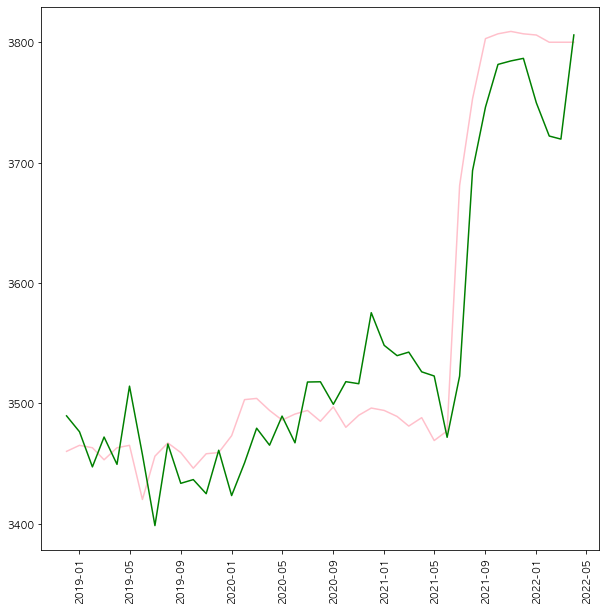

In [91]:
plt.plot(y_test, color='pink')
plt.plot(y_pred_lr_lag2, color='green')
plt.xticks(rotation = 90)
plt.show()

In [92]:
mape_result['lr_lag2_only7'] = mean_absolute_percentage_error(y_test, y_pred_lr_lag2)
rmse_result['lr_lag2_only7'] = mean_squared_error(y_test, y_pred_lr_lag2)**(0.5)

In [93]:
print("MAPE : ", mape_result)
print("RMSE : ", rmse_result)

MAPE :  {'Holt-Winters': 0.028378934439508077, 'AR': 0.048774179794562375, 'SARIMAX': 0.01966831892076289, 'Linear_lag2_12': 0.015620843993905011, 'lr_lag2_only7': 0.010353345928523834}
RMSE :  {'Holt-Winters': 111.98361535822303, 'AR': 239.4483163554718, 'SARIMAX': 125.4662766076435, 'Linear_lag2_12': 64.6830680201147, 'lr_lag2_only7': 47.12206395362613}


### 훈련셋 + 테스트셋 시각화

/Users/joyeonglae/miniforge3/envs/tf_learn/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


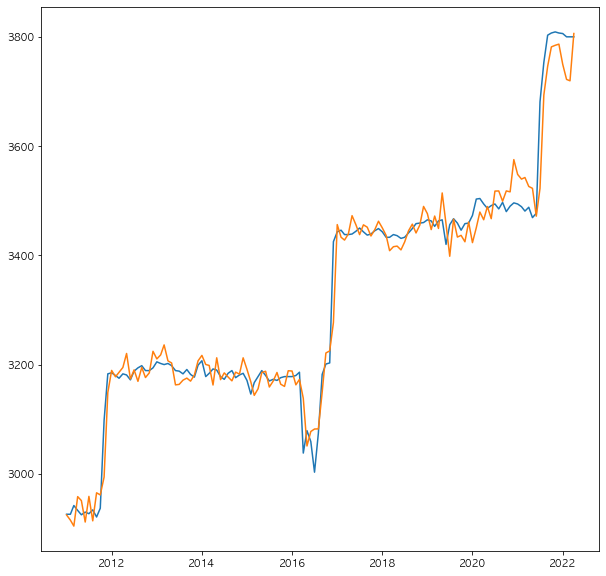

In [94]:
y_pred2 = lr_model.predict(scaler.transform(x))
y_pred2 = pd.DataFrame(y_pred2)
y_pred2.index = y.index
plt.plot(y)
plt.plot(y_pred2)
plt.show()

In [95]:
coef = list(zip(lr_model.coef_, list(x_train)))
coef.sort(reverse=True)
cnt = 0
for ele in coef:
    print(ele)
    cnt += 1
    if cnt == 10:
        break

(493.70574970733406, 't')
(132.11152363097554, '런던소맥종가-10')
(114.19614592557329, '미국팜유종가-10')
(106.257685252406, '미국대두유종가10개월증가량')
(102.71037206728163, '미국소맥변동 %')
(95.30023885658207, '런던설탕종가-10')
(85.76476632978151, '런던소맥종가10개월증가량')
(76.32340927259654, '런던소맥종가')
(53.200879827141506, '미국대두유종가-10')
(50.03655846072109, '런던설탕종가10개월증가량')


## 설탕 종가 7만 했을떄

In [96]:
lagged_data

,런던설탕종가,런던설탕거래량,런던설탕변동 %,런던소맥종가,런던소맥거래량,런던소맥변동 %,미국대두유종가,미국대두유거래량,미국대두유변동 %,미국소맥종가,미국소맥변동 %,미국팜유종가,미국팜유변동 %,t,t-1,t+1
날짜,,,,,,,,,,,,,,,,
2011-01-01,811.6,78.07,4.39,203.10,0.18,2.06,57.88,532790.0,0.24,838.63,5.80,1255.25,1.56,2926.0,2926.0,2926.0
2011-02-01,743.8,87.75,-8.35,201.00,0.87,-1.03,56.77,1000000.0,-1.92,816.38,-2.65,1164.00,-7.27,2926.0,2926.0,2926.0
2011-03-01,711.7,89.26,-4.32,202.00,1.01,0.50,58.78,763570.0,3.54,759.13,-7.01,1116.50,-4.08,2926.0,2926.0,2942.0
2011-04-01,615.1,74.98,-13.57,205.00,3.30,1.49,58.13,914890.0,-1.11,804.13,5.93,1138.00,1.93,2942.0,2926.0,2933.0
2011-05-01,672.0,67.93,9.25,193.00,0.75,-5.85,58.49,583590.0,0.62,787.13,-2.11,1153.00,1.32,2933.0,2942.0,2925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,497.1,64.34,2.37,220.25,0.08,-1.91,56.30,290590.0,2.16,770.75,-0.39,1238.75,0.53,3809.0,3807.0,3807.0
2022-01-01,492.5,99.29,-0.93,214.75,0.08,-2.50,64.82,502080.0,15.13,761.25,-1.23,1381.00,11.48,3807.0,3809.0,3806.0
2022-02-01,496.0,102.80,0.71,250.55,0.08,16.67,72.89,817300.0,12.45,928.00,21.90,1774.75,28.51,3806.0,3807.0,3800.0


In [97]:

feature_only_sugar7 = lagged_data.copy()
feature_only_sugar7 = feature_only_sugar7[['런던설탕종가', 't', 't-1', 't+1']]
lagg_features = ['런던설탕종가']

for feature in lagg_features:
    feature_only_sugar7[feature+'-7'] = feature_only_sugar7[feature].shift(7)
    feature_only_sugar7[feature+'7개월증가량'] = feature_only_sugar7[feature]-feature_only_sugar7[feature+'-'+str(7)]

In [98]:
feature_only_sugar7.fillna(method='bfill', inplace=True)
feature_only_sugar7.fillna(method='ffill', inplace=True)

In [99]:
feature_only_sugar7

,런던설탕종가,t,t-1,t+1,런던설탕종가-7,런던설탕종가7개월증가량
날짜,,,,,,
2011-01-01,811.6,2926.0,2926.0,2926.0,811.6,-40.8
2011-02-01,743.8,2926.0,2926.0,2926.0,811.6,-40.8
2011-03-01,711.7,2926.0,2926.0,2942.0,811.6,-40.8
2011-04-01,615.1,2942.0,2926.0,2933.0,811.6,-40.8
2011-05-01,672.0,2933.0,2942.0,2925.0,811.6,-40.8
...,...,...,...,...,...,...
2021-12-01,497.1,3809.0,3807.0,3807.0,459.6,37.5
2022-01-01,492.5,3807.0,3809.0,3806.0,447.7,44.8
2022-02-01,496.0,3806.0,3807.0,3800.0,445.7,50.3


In [100]:
y = feature_only_sugar7['t+1']
x = feature_only_sugar7.drop(columns=['t+1'], axis=1)


# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train, x_test = x[:int(len(x)*(70/100))], x[int(len(x)*(70/100)):]
y_train, y_test = y[:int(len(y)*(70/100))], y[int(len(y)*(70/100)):]

In [101]:
x_train

,런던설탕종가,t,t-1,런던설탕종가-7,런던설탕종가7개월증가량
날짜,,,,,
2011-01-01,811.6,2926.0,2926.0,811.6,-40.8
2011-02-01,743.8,2926.0,2926.0,811.6,-40.8
2011-03-01,711.7,2926.0,2926.0,811.6,-40.8
2011-04-01,615.1,2942.0,2926.0,811.6,-40.8
2011-05-01,672.0,2933.0,2942.0,811.6,-40.8
...,...,...,...,...,...
2018-07-01,317.9,3431.0,3436.0,394.7,-76.8
2018-08-01,325.9,3433.0,3431.0,352.4,-26.5
2018-09-01,320.5,3441.0,3433.0,361.3,-40.8


In [102]:
features = list(x_train)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

x_train.columns = features
x_test.columns= features

In [103]:
list(x_test)

['런던설탕종가', 't', 't-1', '런던설탕종가-7', '런던설탕종가7개월증가량']

In [104]:
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)
y_pred_lr_lag2 = lr_model.predict(x_test)

In [105]:
y_pred_lr_lag2 = pd.DataFrame(y_pred_lr_lag2)
y_test = pd.DataFrame(y_test)
y_pred_lr_lag2.index = result['날짜'][int(len(x)*(70/100)):]
y_test.index = result['날짜'][int(len(x)*(70/100)):]

### 테스트셋 시각화

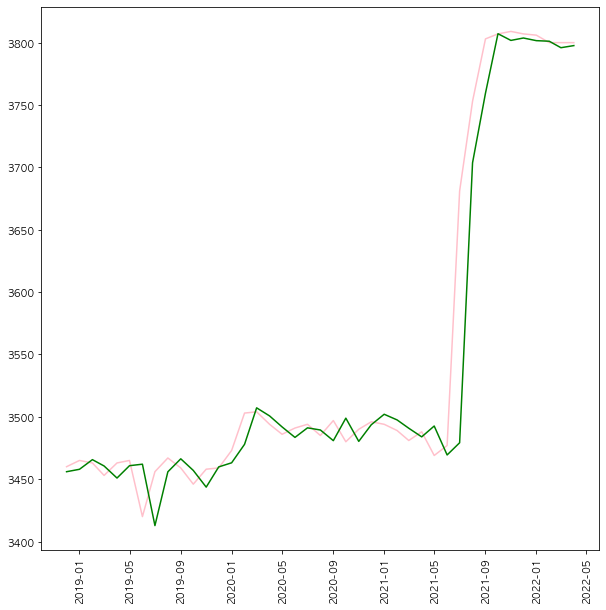

In [106]:
plt.plot(y_test, color='pink')
plt.plot(y_pred_lr_lag2, color='green')
plt.xticks(rotation = 90)
plt.show()

In [107]:
mape_result['lr_lag2_onlysugar7'] = mean_absolute_percentage_error(y_test, y_pred_lr_lag2)
rmse_result['lr_lag2_onlysugar7'] = mean_squared_error(y_test, y_pred_lr_lag2)**(0.5)

In [108]:
print("MAPE : ", mape_result)
print("RMSE : ", rmse_result)

MAPE :  {'Holt-Winters': 0.028378934439508077, 'AR': 0.048774179794562375, 'SARIMAX': 0.01966831892076289, 'Linear_lag2_12': 0.015620843993905011, 'lr_lag2_only7': 0.010353345928523834, 'lr_lag2_onlysugar7': 0.004486116983439245}
RMSE :  {'Holt-Winters': 111.98361535822303, 'AR': 239.4483163554718, 'SARIMAX': 125.4662766076435, 'Linear_lag2_12': 64.6830680201147, 'lr_lag2_only7': 47.12206395362613, 'lr_lag2_onlysugar7': 35.64064947295688}


### 훈련셋 + 테스트셋 시각화

/Users/joyeonglae/miniforge3/envs/tf_learn/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


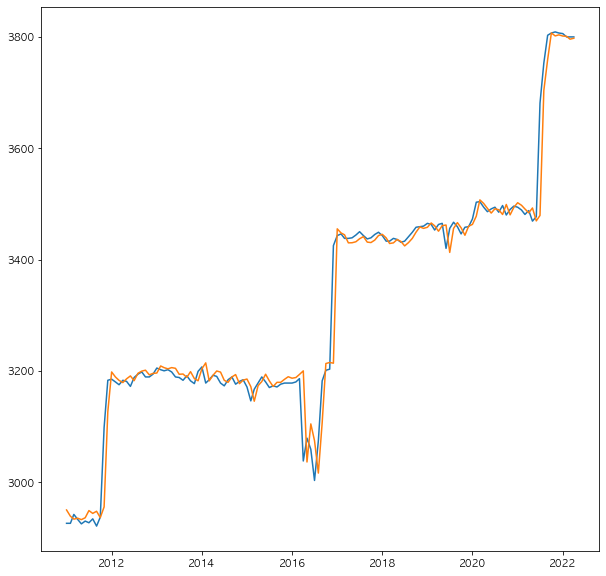

In [109]:
y_pred2 = lr_model.predict(scaler.transform(x))
y_pred2 = pd.DataFrame(y_pred2)
y_pred2.index = y.index
plt.plot(y)
plt.plot(y_pred2)
plt.show()

In [110]:
coef = list(zip(lr_model.coef_, list(x_train)))
coef.sort(reverse=True)
cnt = 0
for ele in coef:
    print(ele)
    cnt += 1
    if cnt == 10:
        break

(591.3526277813005, 't')
(81.4162627404199, '런던설탕종가')
(-31.96573034932249, '런던설탕종가7개월증가량')
(-66.92690644766688, 't-1')
(-70.54385415605735, '런던설탕종가-7')


### Granger Casuality test 기반으로 해서 0.05 이하인 것중 가장 작은 것만 선택하여 해봄.

In [111]:
lagged_data

,런던설탕종가,런던설탕거래량,런던설탕변동 %,런던소맥종가,런던소맥거래량,런던소맥변동 %,미국대두유종가,미국대두유거래량,미국대두유변동 %,미국소맥종가,미국소맥변동 %,미국팜유종가,미국팜유변동 %,t,t-1,t+1
날짜,,,,,,,,,,,,,,,,
2011-01-01,811.6,78.07,4.39,203.10,0.18,2.06,57.88,532790.0,0.24,838.63,5.80,1255.25,1.56,2926.0,2926.0,2926.0
2011-02-01,743.8,87.75,-8.35,201.00,0.87,-1.03,56.77,1000000.0,-1.92,816.38,-2.65,1164.00,-7.27,2926.0,2926.0,2926.0
2011-03-01,711.7,89.26,-4.32,202.00,1.01,0.50,58.78,763570.0,3.54,759.13,-7.01,1116.50,-4.08,2926.0,2926.0,2942.0
2011-04-01,615.1,74.98,-13.57,205.00,3.30,1.49,58.13,914890.0,-1.11,804.13,5.93,1138.00,1.93,2942.0,2926.0,2933.0
2011-05-01,672.0,67.93,9.25,193.00,0.75,-5.85,58.49,583590.0,0.62,787.13,-2.11,1153.00,1.32,2933.0,2942.0,2925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,497.1,64.34,2.37,220.25,0.08,-1.91,56.30,290590.0,2.16,770.75,-0.39,1238.75,0.53,3809.0,3807.0,3807.0
2022-01-01,492.5,99.29,-0.93,214.75,0.08,-2.50,64.82,502080.0,15.13,761.25,-1.23,1381.00,11.48,3807.0,3809.0,3806.0
2022-02-01,496.0,102.80,0.71,250.55,0.08,16.67,72.89,817300.0,12.45,928.00,21.90,1774.75,28.51,3806.0,3807.0,3800.0


In [112]:

feature_granger = lagged_data.copy()
feature_granger = feature_granger[['런던설탕종가','미국대두유종가', '미국소맥종가', '미국팜유종가', 't', 't-1', 't+1']]

feature_granger['런던설탕종가'+'-7'] = feature_granger['런던설탕종가'].shift(7)
feature_granger['런던설탕종가'+'7개월증가량'] = feature_granger['런던설탕종가']-feature_granger['런던설탕종가'+'-'+str(7)]
feature_granger['런던설탕종가'+'-8'] = feature_granger['런던설탕종가'].shift(8)
feature_granger['런던설탕종가'+'8개월증가량'] = feature_granger['런던설탕종가']-feature_granger['런던설탕종가'+'-'+str(8)]
feature_granger['런던설탕종가'+'-9'] = feature_granger['런던설탕종가'].shift(9)
feature_granger['런던설탕종가'+'9개월증가량'] = feature_granger['런던설탕종가']-feature_granger['런던설탕종가'+'-'+str(9)]
feature_granger['런던설탕종가'+'-10'] = feature_granger['런던설탕종가'].shift(10)
feature_granger['런던설탕종가'+'10개월증가량'] = feature_granger['런던설탕종가']-feature_granger['런던설탕종가'+'-'+str(10)]
feature_granger['런던설탕종가'+'-11'] = feature_granger['런던설탕종가'].shift(11)
feature_granger['런던설탕종가'+'11개월증가량'] = feature_granger['런던설탕종가']-feature_granger['런던설탕종가'+'-'+str(11)]
feature_granger['런던설탕종가'+'-12'] = feature_granger['런던설탕종가'].shift(12)
feature_granger['런던설탕종가'+'12개월증가량'] = feature_granger['런던설탕종가']-feature_granger['런던설탕종가'+'-'+str(12)]
feature_granger['런던설탕종가'+'-13'] = feature_granger['런던설탕종가'].shift(13)
feature_granger['런던설탕종가'+'13개월증가량'] = feature_granger['런던설탕종가']-feature_granger['런던설탕종가'+'-'+str(13)]
feature_granger['런던설탕종가'+'-14'] = feature_granger['런던설탕종가'].shift(14)
feature_granger['런던설탕종가'+'14개월증가량'] = feature_granger['런던설탕종가']-feature_granger['런던설탕종가'+'-'+str(14)]

feature_granger['미국대두유종가'+'-11'] = feature_granger['미국대두유종가'].shift(11)
feature_granger['미국대두유종가'+'11개월증가량'] = feature_granger['미국대두유종가']-feature_granger['미국대두유종가'+'-'+str(11)]
feature_granger['미국대두유종가'+'-12'] = feature_granger['미국대두유종가'].shift(12)
feature_granger['미국대두유종가'+'12개월증가량'] = feature_granger['미국대두유종가']-feature_granger['미국대두유종가'+'-'+str(12)]
feature_granger['미국대두유종가'+'-13'] = feature_granger['미국대두유종가'].shift(13)
feature_granger['미국대두유종가'+'13개월증가량'] = feature_granger['미국대두유종가']-feature_granger['미국대두유종가'+'-'+str(13)]
feature_granger['미국대두유종가'+'-14'] = feature_granger['미국대두유종가'].shift(14)
feature_granger['미국대두유종가'+'14개월증가량'] = feature_granger['미국대두유종가']-feature_granger['미국대두유종가'+'-'+str(14)]


feature_granger['미국팜유종가'+'-14'] = feature_granger['미국팜유종가'].shift(14)
feature_granger['미국팜유종가'+'14개월증가량'] = feature_granger['미국팜유종가']-feature_granger['미국팜유종가'+'-'+str(14)]



In [113]:
feature_granger.fillna(method='bfill', inplace=True)
feature_granger.fillna(method='ffill', inplace=True)

In [114]:
y = feature_granger['t+1']
x = feature_granger.drop(columns=['t+1'], axis=1)

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train, x_test = x[:int(len(x)*(70/100))], x[int(len(x)*(70/100)):]
y_train, y_test = y[:int(len(y)*(70/100))], y[int(len(y)*(70/100)):]

In [115]:
x_train

,런던설탕종가,미국대두유종가,미국소맥종가,미국팜유종가,t,t-1,런던설탕종가-7,런던설탕종가7개월증가량,런던설탕종가-8,런던설탕종가8개월증가량,...,미국대두유종가-11,미국대두유종가11개월증가량,미국대두유종가-12,미국대두유종가12개월증가량,미국대두유종가-13,미국대두유종가13개월증가량,미국대두유종가-14,미국대두유종가14개월증가량,미국팜유종가-14,미국팜유종가14개월증가량
날짜,,,,,,,,,,,,,,,,,,,,,
2011-01-01,811.6,57.88,838.63,1255.25,2926.0,2926.0,811.6,-40.8,811.6,-148.3,...,57.88,-5.79,57.88,-7.01,57.88,-3.79,57.88,-2.78,1255.25,-119.75
2011-02-01,743.8,56.77,816.38,1164.00,2926.0,2926.0,811.6,-40.8,811.6,-148.3,...,57.88,-5.79,57.88,-7.01,57.88,-3.79,57.88,-2.78,1255.25,-119.75
2011-03-01,711.7,58.78,759.13,1116.50,2926.0,2926.0,811.6,-40.8,811.6,-148.3,...,57.88,-5.79,57.88,-7.01,57.88,-3.79,57.88,-2.78,1255.25,-119.75
2011-04-01,615.1,58.13,804.13,1138.00,2942.0,2926.0,811.6,-40.8,811.6,-148.3,...,57.88,-5.79,57.88,-7.01,57.88,-3.79,57.88,-2.78,1255.25,-119.75
2011-05-01,672.0,58.49,787.13,1153.00,2933.0,2942.0,811.6,-40.8,811.6,-148.3,...,57.88,-5.79,57.88,-7.01,57.88,-3.79,57.88,-2.78,1255.25,-119.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-01,317.9,28.73,554.50,524.50,3431.0,3436.0,394.7,-76.8,390.4,-72.5,...,34.71,-5.98,34.71,-5.98,32.93,-4.20,31.34,-2.61,642.25,-117.75
2018-08-01,325.9,28.37,546.50,535.25,3433.0,3431.0,352.4,-26.5,394.7,-68.8,...,32.57,-4.20,34.71,-6.34,34.71,-6.34,32.93,-4.56,604.50,-69.25
2018-09-01,320.5,28.68,510.50,512.25,3441.0,3433.0,361.3,-40.8,352.4,-31.9,...,34.75,-6.07,32.57,-3.89,34.71,-6.03,34.71,-6.03,624.50,-112.25


In [116]:
features = list(x_train)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

x_train.columns = features
x_test.columns= features

In [117]:
list(x_test)

['런던설탕종가',
 '미국대두유종가',
 '미국소맥종가',
 '미국팜유종가',
 't',
 't-1',
 '런던설탕종가-7',
 '런던설탕종가7개월증가량',
 '런던설탕종가-8',
 '런던설탕종가8개월증가량',
 '런던설탕종가-9',
 '런던설탕종가9개월증가량',
 '런던설탕종가-10',
 '런던설탕종가10개월증가량',
 '런던설탕종가-11',
 '런던설탕종가11개월증가량',
 '런던설탕종가-12',
 '런던설탕종가12개월증가량',
 '런던설탕종가-13',
 '런던설탕종가13개월증가량',
 '런던설탕종가-14',
 '런던설탕종가14개월증가량',
 '미국대두유종가-11',
 '미국대두유종가11개월증가량',
 '미국대두유종가-12',
 '미국대두유종가12개월증가량',
 '미국대두유종가-13',
 '미국대두유종가13개월증가량',
 '미국대두유종가-14',
 '미국대두유종가14개월증가량',
 '미국팜유종가-14',
 '미국팜유종가14개월증가량']

In [118]:
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)
y_pred_lr_lag2 = lr_model.predict(x_test)

In [119]:
y_pred_lr_lag2 = pd.DataFrame(y_pred_lr_lag2)
y_test = pd.DataFrame(y_test)
y_pred_lr_lag2.index = result['날짜'][int(len(x)*(70/100)):]
y_test.index = result['날짜'][int(len(x)*(70/100)):]

### 테스트셋 시각화

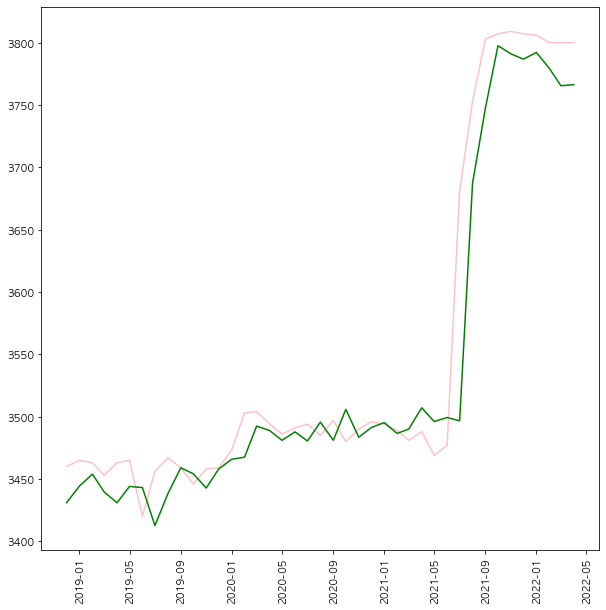

In [120]:
plt.plot(y_test, color='pink')
plt.plot(y_pred_lr_lag2, color='green')
plt.xticks(rotation = 90)
plt.show()

In [121]:
mape_result['Linear_lag2_granger'] = mean_absolute_percentage_error(y_test, y_pred_lr_lag2)
rmse_result['Linear_lag2_granger'] = mean_squared_error(y_test, y_pred_lr_lag2)**(0.5)

In [122]:
print("MAPE : ", mape_result)
print("RMSE : ", rmse_result)

MAPE :  {'Holt-Winters': 0.028378934439508077, 'AR': 0.048774179794562375, 'SARIMAX': 0.01966831892076289, 'Linear_lag2_12': 0.015620843993905011, 'lr_lag2_only7': 0.010353345928523834, 'lr_lag2_onlysugar7': 0.004486116983439245, 'Linear_lag2_granger': 0.006279198189420923}
RMSE :  {'Holt-Winters': 111.98361535822303, 'AR': 239.4483163554718, 'SARIMAX': 125.4662766076435, 'Linear_lag2_12': 64.6830680201147, 'lr_lag2_only7': 47.12206395362613, 'lr_lag2_onlysugar7': 35.64064947295688, 'Linear_lag2_granger': 37.0143538254572}


### 훈련셋 + 테스트셋 시각화

In [123]:
y

날짜
2011-01-01    2926.0
2011-02-01    2926.0
2011-03-01    2942.0
2011-04-01    2933.0
2011-05-01    2925.0
               ...  
2021-12-01    3807.0
2022-01-01    3806.0
2022-02-01    3800.0
2022-03-01    3800.0
2022-04-01    3800.0
Freq: MS, Name: t+1, Length: 136, dtype: float64

/Users/joyeonglae/miniforge3/envs/tf_learn/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


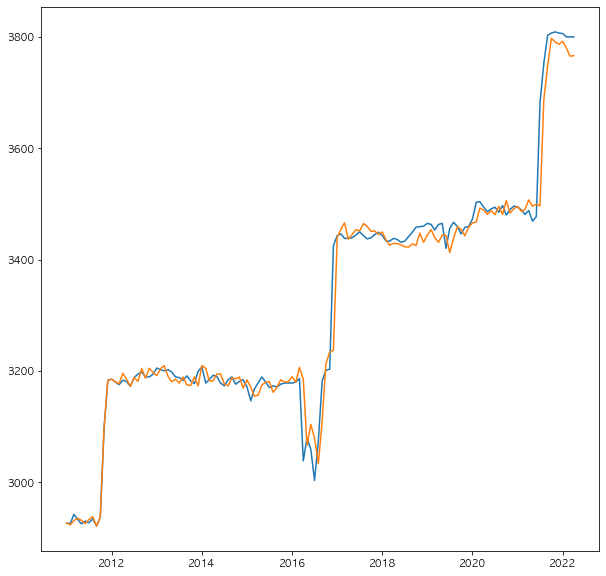

In [124]:
y_pred2 = lr_model.predict(scaler.transform(x))
# y = y.set_index('날짜')
y_pred2 = pd.DataFrame(y_pred2)
y_pred2.index = y.index
plt.plot(y)
plt.plot(y_pred2)
plt.show()

In [125]:
coef = list(zip(lr_model.coef_, list(x_train)))
coef.sort(reverse=True)
cnt = 0
for ele in coef:
    print(ele)
    cnt += 1
    if cnt == 10:
        break

(3861.9823179091823, '런던설탕종가-10')
(3619.9190441707888, '런던설탕종가10개월증가량')
(929.6086758449187, '미국대두유종가-11')
(615.0592778488383, '미국대두유종가11개월증가량')
(500.10575738496345, 't')
(499.29938501708716, '런던설탕종가14개월증가량')
(492.18136596370806, '런던설탕종가-14')
(442.9506918268109, '미국대두유종가-13')
(437.4669243191744, '런던설탕종가-8')
(352.068469925062, '런던설탕종가8개월증가량')


## 다중공선성 반영

In [172]:
lagg_features = ['런던설탕종가', '런던소맥종가', '미국대두유종가', '미국소맥종가', '미국팜유종가']
feature_lag12 = lagged_data.copy()
feature_lag7_slidingx = lagged_data.copy()

for feature in lagg_features:
    feature_lag12 = slidingwindow(feature_lag12, feature, 12, is_diff=True)

vif_data = feature_lag12.copy()
vif_data.fillna(method='ffill', inplace=True)
vif_data.fillna(method='bfill', inplace=True)
vif_data = vif_data[['런던설탕변동 %','런던소맥거래량','런던소맥변동 %','미국대두유거래량','미국팜유종가','미국팜유변동 %','런던설탕종가-9','런던설탕종가1년증가량','런던소맥종가1년증가량','미국대두유종가1년증가량','t-1', 't', 't+1']]

In [173]:
y = vif_data['t+1']
x = vif_data.drop(columns=['t+1'], axis=1)

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train, x_test = x[:int(len(x)*(70/100))], x[int(len(x)*(70/100)):]
y_train, y_test = y[:int(len(y)*(70/100))], y[int(len(y)*(70/100)):]

In [174]:
x_train

,런던설탕변동 %,런던소맥거래량,런던소맥변동 %,미국대두유거래량,미국팜유종가,미국팜유변동 %,런던설탕종가-9,런던설탕종가1년증가량,런던소맥종가1년증가량,미국대두유종가1년증가량,t-1,t
날짜,,,,,,,,,,,,
2011-01-01,4.39,0.18,2.06,532790.0,1255.25,1.56,811.6,-209.6,-50.85,-5.79,2926.0,2926.0
2011-02-01,-8.35,0.87,-1.03,1000000.0,1164.00,-7.27,811.6,-209.6,-50.85,-5.79,2926.0,2926.0
2011-03-01,-4.32,1.01,0.50,763570.0,1116.50,-4.08,811.6,-209.6,-50.85,-5.79,2926.0,2926.0
2011-04-01,-13.57,3.30,1.49,914890.0,1138.00,1.93,811.6,-209.6,-50.85,-5.79,2926.0,2942.0
2011-05-01,9.25,0.75,-5.85,583590.0,1153.00,1.32,811.6,-209.6,-50.85,-5.79,2942.0,2933.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-01,-9.04,4.77,24.65,295550.0,524.50,-7.86,384.4,-52.8,3.10,-5.59,3436.0,3431.0
2018-08-01,2.52,9.14,-2.25,241480.0,535.25,2.05,390.4,-69.0,45.60,-5.98,3431.0,3433.0
2018-09-01,-1.66,4.20,-3.29,248370.0,512.25,-4.30,394.7,-36.3,40.00,-4.20,3433.0,3441.0


In [175]:
features = list(x_train)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

x_train.columns = features
x_test.columns= features

In [176]:
list(x_test)

['런던설탕변동 %',
 '런던소맥거래량',
 '런던소맥변동 %',
 '미국대두유거래량',
 '미국팜유종가',
 '미국팜유변동 %',
 '런던설탕종가-9',
 '런던설탕종가1년증가량',
 '런던소맥종가1년증가량',
 '미국대두유종가1년증가량',
 't-1',
 't']

In [177]:
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)
y_pred_lr_lag2 = lr_model.predict(x_test)

In [178]:
y_pred_lr_lag2 = pd.DataFrame(y_pred_lr_lag2)
y_test = pd.DataFrame(y_test)
y_pred_lr_lag2.index = result['날짜'][int(len(x)*(70/100)):]
y_test.index = result['날짜'][int(len(x)*(70/100)):]

In [179]:
vif_data

,런던설탕변동 %,런던소맥거래량,런던소맥변동 %,미국대두유거래량,미국팜유종가,미국팜유변동 %,런던설탕종가-9,런던설탕종가1년증가량,런던소맥종가1년증가량,미국대두유종가1년증가량,t-1,t,t+1
날짜,,,,,,,,,,,,,
2011-01-01,4.39,0.18,2.06,532790.0,1255.25,1.56,811.6,-209.6,-50.85,-5.79,2926.0,2926.0,2926.0
2011-02-01,-8.35,0.87,-1.03,1000000.0,1164.00,-7.27,811.6,-209.6,-50.85,-5.79,2926.0,2926.0,2926.0
2011-03-01,-4.32,1.01,0.50,763570.0,1116.50,-4.08,811.6,-209.6,-50.85,-5.79,2926.0,2926.0,2942.0
2011-04-01,-13.57,3.30,1.49,914890.0,1138.00,1.93,811.6,-209.6,-50.85,-5.79,2926.0,2942.0,2933.0
2011-05-01,9.25,0.75,-5.85,583590.0,1153.00,1.32,811.6,-209.6,-50.85,-5.79,2942.0,2933.0,2925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,2.37,0.08,-1.91,290590.0,1238.75,0.53,420.0,64.7,26.05,11.78,3807.0,3809.0,3807.0
2022-01-01,-0.93,0.08,-2.50,502080.0,1381.00,11.48,448.4,41.0,12.65,11.68,3809.0,3807.0,3806.0
2022-02-01,0.71,0.08,16.67,817300.0,1774.75,28.51,459.6,37.4,7.35,13.48,3807.0,3806.0,3800.0


In [180]:
indexes = vif_data.index
columns2 = vif_data.columns
vif_data = scaler.fit_transform(vif_data)

In [182]:
vif_data = pd.DataFrame(vif_data)
vif_data.index = indexes
vif_data.columns = columns2

In [183]:
import statsmodels.api as sm
import numpy as np
features = list(vif_data)
features.remove('t')

model = sm.OLS(vif_data['t'], vif_data[features])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      t   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              3848.
Date:                Tue, 10 May 2022   Prob (F-statistic):                   3.20e-153
Time:                        23:07:05   Log-Likelihood:                          304.30
No. Observations:                 136   AIC:                                     -584.6
Df Residuals:                     124   BIC:                                     -549.6
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
런던설탕변동 %         0.0058      0.011      0.542      0.589      -0.015       0.027
런던소맥거래량          0.0080      0.010      0.775      0.440      -0.012       0.028
런던소맥변동 %         0.0211      0.016      1.362      0.176      -0.010       0.052
미국대두유거래량         0.0127      0.011      1.166      0.246      -0.009       0.034
미국팜유종가           0.0220      0.021      1.047      0.297      -0.020       0.064
미국팜유변동 %        -0.0216      0.013     -1.644      0.103      -0.048       0.004
런던설탕종가-9        -0.0203      0.015     -1.353      0.179      -0.050       0.009
런던설탕종가1년증가량     -0.0091      0.014     -0.666      0.507      -0.036       0.018
런던소맥종가1년증가량      0.0033      0.015      0.228      0.820      -0.026       0.032
미국대두유종가1년증가량    -0.0177      0.022     -0.822      0.413      -0.060       0.025
t-1              0.4773      0.041     11.745      0.000       0.397       0.558
t+1              0.5202      0.041     12.781      0.000       0.440       0.601
==============================================================================
Omnibus:                       48.163   Durbin-Watson:                   2.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.950
Skew:                          -0.885   Prob(JB):                     2.63e-94
Kurtosis:                      11.539   Cond. No.                         33.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 테스트셋 시각화

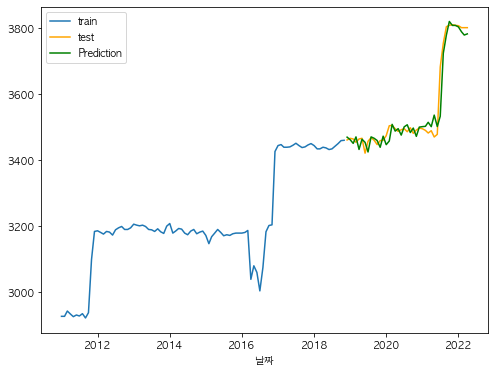

In [133]:
plt.figure(figsize=(8,6))
plt.plot(y_train, label="train")
plt.plot(y_test, color='orange', label="test")
plt.plot(y_pred_lr_lag2, color='green', label="Prediction")
# plt.xticks(rotation = 90)
plt.xlabel('날짜')
plt.legend()
plt.show()

In [134]:
mape_result['Linear_lag2_VIF'] = mean_absolute_percentage_error(y_test, y_pred_lr_lag2)
rmse_result['Linear_lag2_VIF'] = mean_squared_error(y_test, y_pred_lr_lag2)**(0.5)

In [319]:
print("MAPE : ", mape_result)
print("RMSE : ", rmse_result)

MAPE :  {'Holt-Winters': 0.028378934439508077, 'AR': 0.048774179794562375, 'SARIMAX': 0.01966831892076289, 'Linear_lag2_12': 0.015975073421226043, 'Linear_lag2_granger': 0.006279198189420923, 'Linear_lag2_VIF': 0.005575474528425832, 'Decision Tree': 0.03080049751031414, 'Support Vector Machine': 0.09273213012883638, 'LSTM': 0.016555142831400284, 'LSTM_extra': 0.01599099512638373}
RMSE :  {'Holt-Winters': 111.98361535822303, 'AR': 239.4483163554718, 'SARIMAX': 125.4662766076435, 'Linear_lag2_12': 67.83183556181287, 'Linear_lag2_granger': 37.0143538254572, 'Linear_lag2_VIF': 31.374438541849454, 'Decision Tree': 177.8652545622326, 'Support Vector Machine': 357.80246559938456, 'LSTM': 69.03943715374518, 'LSTM_extra': 73.77230959254528}


### 훈련셋 + 테스트셋 시각화

In [320]:
y

날짜
2011-01-01    2926.0
2011-02-01    2926.0
2011-03-01    2942.0
2011-04-01    2933.0
2011-05-01    2925.0
               ...  
2021-12-01    3807.0
2022-01-01    3806.0
2022-02-01    3800.0
2022-03-01    3800.0
2022-04-01    3800.0
Name: t+1, Length: 136, dtype: float64

/Users/joyeonglae/miniforge3/envs/tf_learn/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


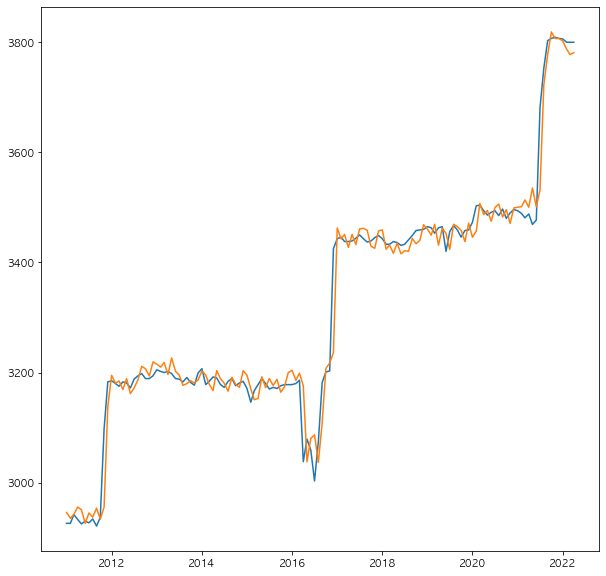

In [321]:
y_pred2 = lr_model.predict(scaler.transform(x))
# y = y.set_index('날짜')
y_pred2 = pd.DataFrame(y_pred2)
y_pred2.index = y.index
plt.plot(y)
plt.plot(y_pred2)
plt.show()

In [323]:
tmp = list(map(abs, lr_model.coef_))
coef = list(zip(tmp, list(x_train)))
coef.sort(reverse=True)
cnt = 0
for ele in coef:
    print(ele[1])
    cnt += 1
    if cnt == 10:
        break

t
t-1
미국대두유거래량
미국대두유종가1년증가량
런던소맥거래량
미국팜유종가
런던설탕종가-9
미국팜유변동 %
런던설탕변동 %
런던소맥변동 %


## lag 없을 때

In [148]:
list(x_train)

['런던설탕변동 %',
 '런던소맥거래량',
 '런던소맥변동 %',
 '미국대두유거래량',
 '미국팜유종가',
 '미국팜유변동 %',
 '런던설탕종가-9',
 '런던설탕종가1년증가량',
 '런던소맥종가1년증가량',
 '미국대두유종가1년증가량',
 '미국소맥종가-3',
 't-1',
 't']

In [161]:
x_train_nl = x_train.drop(columns=['t-1'])
x_test_nl = x_test.drop(columns=['t-1'])

In [162]:
x_test_nl

,런던설탕변동 %,런던소맥거래량,런던소맥변동 %,미국대두유거래량,미국팜유종가,미국팜유변동 %,런던설탕종가-9,런던설탕종가1년증가량,런던소맥종가1년증가량,미국대두유종가1년증가량,미국소맥종가-3,t
0,0.335346,0.051434,0.415967,0.187572,0.046397,0.724880,0.020842,0.403546,0.709369,0.436058,0.242064,1.001862
1,0.589698,0.002967,0.325451,0.380949,0.112589,0.799887,-0.022544,0.466430,0.726195,0.423558,0.223860,1.003724
2,0.565187,-0.000989,0.254005,0.776049,0.029384,0.133598,0.028073,0.466194,0.683748,0.602885,0.251904,1.013035
3,0.258615,0.087043,0.406306,0.349687,0.052892,0.601755,0.017227,0.505910,0.593881,0.597115,0.227304,1.009311
4,0.606039,0.243323,0.337401,0.800932,0.039901,0.426833,-0.049979,0.499291,0.606119,0.593269,0.253872,0.990689
5,0.450089,0.010880,0.281719,0.484821,0.046087,0.516841,-0.032965,0.466903,0.489101,0.518750,0.140220,1.009311
6,0.471758,0.000989,0.230867,0.784343,0.005258,0.294650,-0.044449,0.468794,0.498279,0.615385,0.139728,1.013035
7,0.447957,0.427300,0.382660,0.150130,0.051655,0.722615,0.030413,0.538298,0.149904,0.665385,0.081672,0.929236
8,0.250089,0.585559,0.101195,0.068811,0.083204,0.635154,0.014462,0.508983,0.186233,0.659135,0.231004,0.996276
9,0.998579,0.392681,0.518180,0.038213,0.060625,0.386923,-0.018928,0.468794,0.111663,0.687019,0.272568,1.016760


In [163]:
lr_model = LinearRegression()

lr_model.fit(x_train_nl, y_train)
y_pred = lr_model.predict(x_test_nl)
print(mean_squared_error(y_test, y_pred)**(0.5))
list(zip(y_test['t+1'],y_pred))[:10]

47.55117339578391


[(3460.0, 3470.9651503611203),
 (3465.0, 3464.725877977896),
 (3463.0, 3442.8026758546926),
 (3453.0, 3462.615206036075),
 (3463.0, 3422.5581339024384),
 (3465.0, 3456.596152419768),
 (3420.0, 3443.7554485157993),
 (3456.0, 3412.3393084612553),
 (3467.0, 3440.5924302406866),
 (3459.0, 3436.8114581848445)]

In [164]:
y_pred = pd.DataFrame(y_pred)
y_test = pd.DataFrame(y_test)
y_pred.index = result['날짜'][int(len(x)*(70/100)):]
y_test.index = result['날짜'][int(len(x)*(70/100)):]

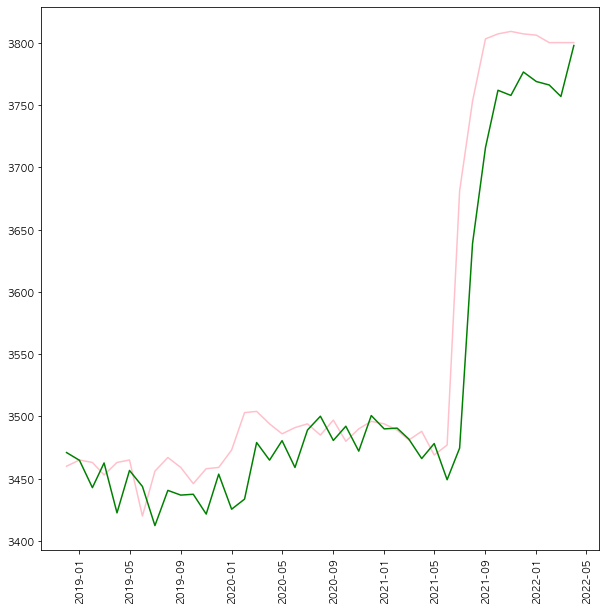

In [165]:
plt.plot(y_test, color='pink')
plt.plot(y_pred, color='green')
plt.xticks(rotation = 90)
plt.show()

- lag를 없앴을 때, 가격 예측이 너무 많이 틀려버리는 경향이 있다.

### Decision Tree 

In [170]:
dt_model = DecisionTreeRegressor()

dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
y_pred = pd.DataFrame(y_pred)
y_pred.columns=['pred']
y_pred.index = result['날짜'][int(len(x)*(70/100)):]

print(mean_squared_error(y_test, y_pred)**(0.5))
list(zip(y_test['t+1'],y_pred['pred']))[:10]

177.8652545622326


[(3460.0, 3459.0),
 (3465.0, 3431.0),
 (3463.0, 3459.0),
 (3453.0, 3459.0),
 (3463.0, 3458.0),
 (3465.0, 3459.0),
 (3420.0, 3459.0),
 (3456.0, 3458.0),
 (3467.0, 3449.0),
 (3459.0, 3449.0)]

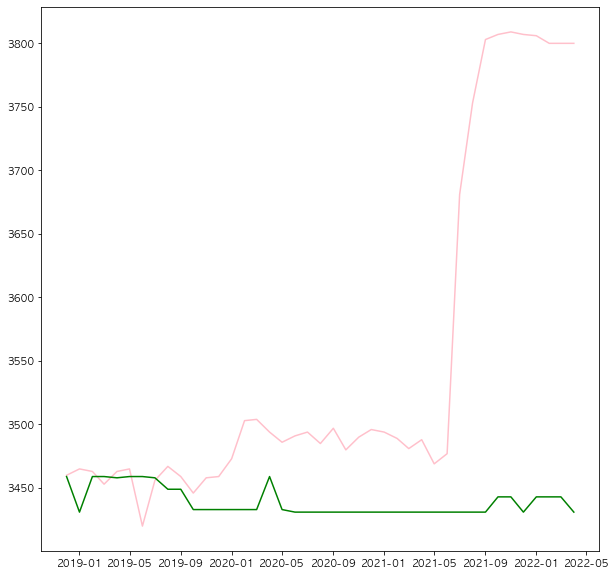

In [171]:
import matplotlib.pyplot as plt
plt.plot(y_test, color='pink')
plt.plot(y_pred, color='green')
plt.show()

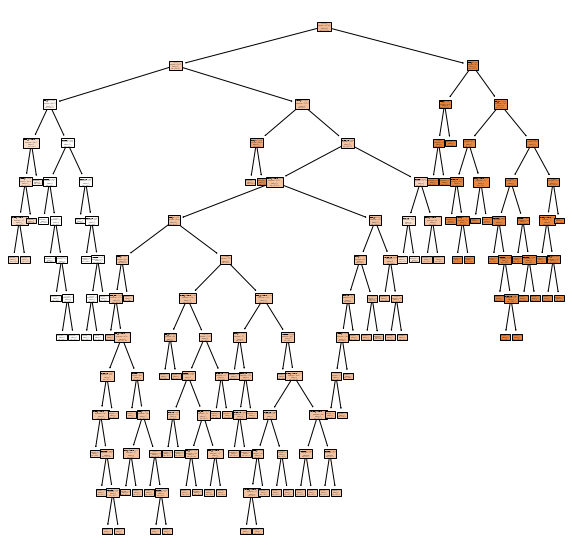

In [172]:
from sklearn.tree import plot_tree
plot_tree(dt_model, filled=True, feature_names=list(x_train))
plt.show()

In [173]:
list(zip(dt_model.feature_importances_, list(x_train)))

[(7.466151107471052e-05, '런던설탕변동 %'),
 (0.00016680698305432826, '런던소맥거래량'),
 (0.0073407523745142285, '런던소맥변동 %'),
 (0.008669024999034545, '미국대두유거래량'),
 (0.0012557482504120905, '미국팜유종가'),
 (7.527233591920948e-05, '미국팜유변동 %'),
 (0.022821739102794645, '런던설탕종가-9'),
 (0.0022930347413601783, '런던설탕종가1년증가량'),
 (0.0010387709440244765, '런던소맥종가1년증가량'),
 (0.00027662244903194533, '미국대두유종가1년증가량'),
 (0.026529158466190843, '미국소맥종가-3'),
 (0.0001911924633432132, 't-1'),
 (0.9292672153792455, 't')]

In [175]:
rmse_result['Decision Tree'] =mean_squared_error(y_test, y_pred)**(0.5)
mape_result['Decision Tree'] =mean_absolute_percentage_error(y_test, y_pred)


## SVM

In [176]:
svm_model = SVR(kernel='linear', gamma=0.1)

svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

print(mean_absolute_percentage_error(y_test, y_pred))

0.09273213012883638


In [178]:
rmse_result['Support Vector Machine'] =mean_squared_error(y_test, y_pred)**(0.5)
mape_result['Support Vector Machine'] =mean_absolute_percentage_error(y_test, y_pred)

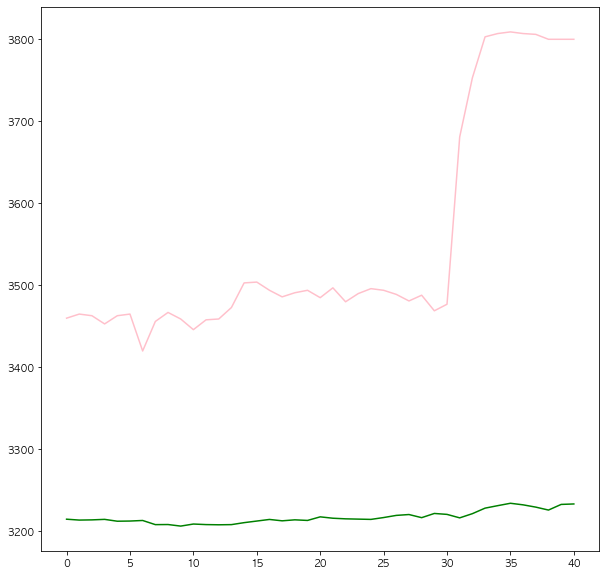

In [179]:
import matplotlib.pyplot as plt
y_test2 = pd.DataFrame(y_test)
y_test2.index = x_test.index
# y_test2 = y_test2.drop('index', axis=1)
# print(y_pred)
plt.plot(y_test2, color='pink')
plt.plot(y_pred, color='green')

In [180]:
list(zip(list(y_test),y_pred))

[('t+1', 3214.9303545354996)]

In [181]:
# y_pred = dt_model.predict([])


## LSTM

In [182]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [183]:
# min_max_scale = MinMaxScaler()
# scaled_data = result.copy()
# scaled_data.set_index('날짜', inplace=True)
# features2 = list(scaled_data)
# scale_features2 = list(features2)
# # scale_features2.remove('t')
# scaled_data[scale_features2] = min_max_scale.fit_transform(scaled_data[scale_features2])
# scaled_data = pd.DataFrame(scaled_data)

# scaled_data.columns = features2
# scaled_data.loc[:,['미국소맥종가', '미국팜유종가', '런던설탕종가', 't']].plot(figsize=(20,5))
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# plt.show()

### only target LSTM

In [184]:
data_t = result.copy()
data_t.set_index('날짜', inplace=True)
train = data_t.iloc[:len(data_t)*70//100]
train = pd.DataFrame(train['t'])
test = data_t.iloc[len(data_t)*70//100:]
test = pd.DataFrame(test['t'])

min_max_scale = MinMaxScaler()
min_max_scale.fit(train)

scaled_train = min_max_scale.fit_transform(train)
scaled_test = min_max_scale.transform(test)


In [185]:
len(test)

41

In [186]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [187]:
X,y = generator[0]

In [188]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [189]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [190]:
model.fit(generator,epochs=10)

Epoch 1/10
83/83 [==============================] - 14s 162ms/step - loss: 0.0615
Epoch 2/10
83/83 [==============================] - 14s 170ms/step - loss: 0.0212
Epoch 3/10
83/83 [==============================] - 15s 181ms/step - loss: 0.0165
Epoch 4/10
83/83 [==============================] - 14s 169ms/step - loss: 0.0155
Epoch 5/10
83/83 [==============================] - 13s 160ms/step - loss: 0.0144
Epoch 6/10
83/83 [==============================] - 13s 154ms/step - loss: 0.0123
Epoch 7/10
83/83 [==============================] - 13s 160ms/step - loss: 0.0116
Epoch 8/10
83/83 [==============================] - 14s 169ms/step - loss: 0.0109
Epoch 9/10
83/83 [==============================] - 16s 194ms/step - loss: 0.0116
Epoch 10/10
83/83 [==============================] - 15s 174ms/step - loss: 0.0094


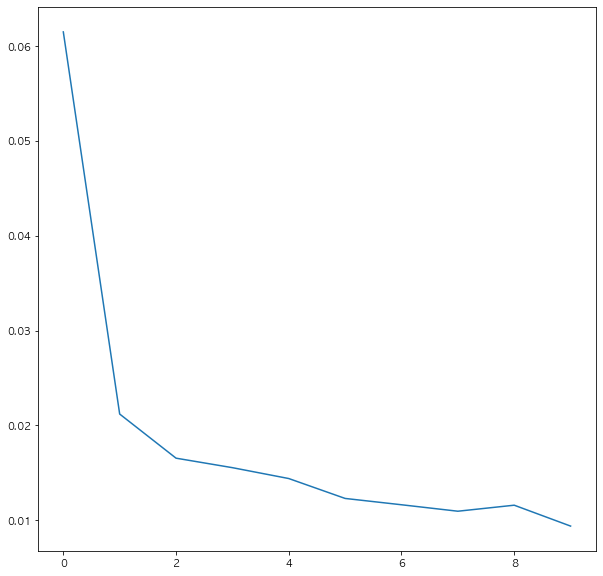

In [191]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [199]:
first_eval_batch = scaled_train[-12:]

In [200]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [201]:
model.predict(first_eval_batch)

array([[1.0610688]], dtype=float32)

In [202]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[list(scaled_test[i])]],axis=1)

In [203]:
true_predictions = min_max_scale.inverse_transform(test_predictions)

In [204]:
true_predictions

array([[3490.79393125],
       [3495.65986896],
       [3499.11810827],
       [3503.18481386],
       [3505.29104817],
       [3503.09007108],
       [3505.38233411],
       [3507.84449399],
       [3492.69499624],
       [3495.87976182],
       [3502.23188078],
       [3504.0556792 ],
       [3500.37428224],
       [3502.03426528],
       [3502.92657578],
       [3508.96047425],
       [3524.99095178],
       [3536.70941675],
       [3540.64265025],
       [3539.63082302],
       [3540.95805407],
       [3543.03061628],
       [3541.4686408 ],
       [3545.33267367],
       [3541.45929456],
       [3542.53788984],
       [3545.74416459],
       [3547.01768672],
       [3545.92257547],
       [3541.64794791],
       [3541.41640425],
       [3533.9465766 ],
       [3532.07431853],
       [3611.99381816],
       [3699.9208107 ],
       [3784.66214144],
       [3844.75562716],
       [3887.93919194],
       [3919.68749583],
       [3942.7630589 ],
       [3956.46792138]])

In [205]:
test['Predictions'] = true_predictions

In [206]:
test

,t,Predictions
날짜,,
2018-12-01,3459.0,3490.793931
2019-01-01,3460.0,3495.659869
2019-02-01,3465.0,3499.118108
2019-03-01,3463.0,3503.184814
2019-04-01,3453.0,3505.291048
2019-05-01,3463.0,3503.090071
2019-06-01,3465.0,3505.382334
2019-07-01,3420.0,3507.844494
2019-08-01,3456.0,3492.694996


<AxesSubplot:xlabel='날짜'>

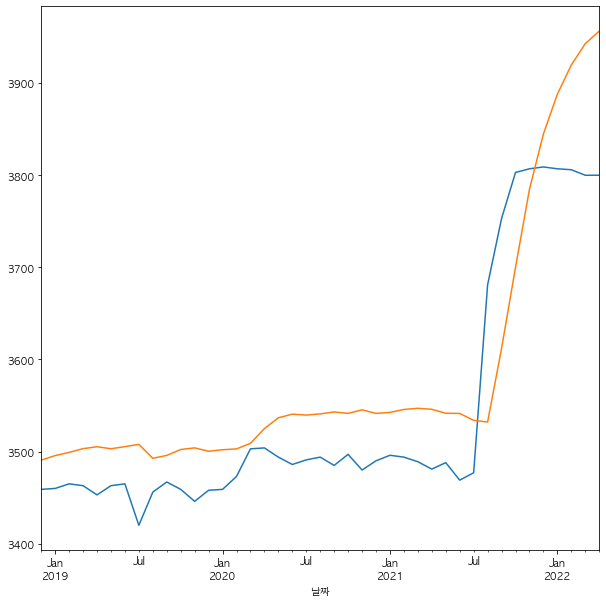

In [207]:
# train.plot()
test['t'].plot()
test['Predictions'].plot()

In [208]:
mape_result['LSTM'] = mean_absolute_percentage_error(test['t'], true_predictions)
rmse_result['LSTM'] = mean_squared_error(test['t'], true_predictions)**(0.5)

### multi LSTM

In [215]:
data_t = result.copy()
data_t.set_index('날짜', inplace=True)
train = data_t.iloc[:len(data_t)*70//100]
test = data_t.iloc[len(data_t)*70//100:]

min_max_scale = MinMaxScaler()
# min_max_scale.fit_transform(data_t)

scaled_train = min_max_scale.fit_transform(train)
scaled_test = min_max_scale.transform(test)


In [216]:
scaled_train

array([[1.        , 0.21504635, 0.65150977, ..., 1.        , 0.53155958,
        0.00931099],
       [0.86266964, 0.28920555, 0.19893428, ..., 0.88710176, 0.28163034,
        0.00931099],
       [0.79765039, 0.30077377, 0.34209591, ..., 0.82833282, 0.37192188,
        0.00931099],
       ...,
       [0.00526636, 0.58507623, 0.4365897 , ..., 0.08072997, 0.36569488,
        0.96834264],
       [0.07656472, 1.        , 0.88561279, ..., 0.03495206, 0.28304557,
        0.98324022],
       [0.0613733 , 0.39646058, 0.42060391, ..., 0.        , 0.3192754 ,
        1.        ]])

In [232]:
n_input = 7
n_features = 14
generator = TimeseriesGenerator(scaled_train, scaled_train[:,13], length=n_input, batch_size=1)

In [233]:
X,y = generator[0]

In [234]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [235]:
# define model
model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [236]:
model.fit(generator,epochs=100)

Epoch 1/100
88/88 [==============================] - 7s 70ms/step - loss: 0.1660
Epoch 2/100
88/88 [==============================] - 6s 71ms/step - loss: 0.0280
Epoch 3/100
88/88 [==============================] - 6s 70ms/step - loss: 0.0204
Epoch 4/100
88/88 [==============================] - 7s 74ms/step - loss: 0.0168
Epoch 5/100
88/88 [==============================] - 6s 71ms/step - loss: 0.0140
Epoch 6/100
88/88 [==============================] - 6s 71ms/step - loss: 0.0123
Epoch 7/100
88/88 [==============================] - 6s 69ms/step - loss: 0.0112
Epoch 8/100
88/88 [==============================] - 6s 68ms/step - loss: 0.0112
Epoch 9/100
88/88 [==============================] - 6s 68ms/step - loss: 0.0096
Epoch 10/100
88/88 [==============================] - 6s 69ms/step - loss: 0.0085
Epoch 11/100
88/88 [==============================] - 6s 68ms/step - loss: 0.0093
Epoch 12/100
88/88 [==============================] - 6s 67ms/step - loss: 0.0079
Epoch 13/100
88/88 [=====

In [237]:
first_eval_batch = scaled_train[-n_input:]

In [238]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [239]:
model.predict(first_eval_batch)

array([[1.0324885]], dtype=float32)

In [240]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
# print(first_eval_batch)
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred) 
    # print([[list(test.iloc[i])]])
    # print(current_batch[:,1:,:])
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[list(scaled_test[i])]],axis=1)

In [241]:
scaled_test_df = pd.DataFrame(scaled_test)
scaled_test_df.columns = data_t.columns

In [250]:
for i in range(len(scaled_test_df)):
    scaled_test_df.loc[i, ['t']] = test_predictions[i][0]
# scaled_test_df['t'] = test_predictions

In [252]:
scaled_test_df

,런던설탕종가,런던설탕거래량,런던설탕변동 %,런던소맥종가,런던소맥거래량,런던소맥변동 %,미국대두유종가,미국대두유거래량,미국대두유변동 %,미국소맥종가,미국소맥변동 %,미국팜유종가,미국팜유변동 %,t
0,0.029573,0.153681,0.335346,0.580909,0.051434,0.415967,0.014205,0.187572,0.520288,0.227304,0.403904,0.046397,0.724880,1.032488
1,0.047397,0.591588,0.589698,0.554281,0.002967,0.325451,0.096907,0.380949,0.917710,0.253872,0.500569,0.112589,0.799887,1.043332
2,0.060968,0.533670,0.565187,0.489144,-0.000989,0.254005,0.090278,0.776049,0.530527,0.140220,0.237870,0.029384,0.133598,1.000575
3,0.013976,0.705202,0.258615,0.506350,0.087043,0.406306,0.039773,0.349687,0.354570,0.139728,0.448825,0.052892,0.601755,0.974687
4,0.034434,0.574504,0.606039,0.487505,0.243323,0.337401,0.015152,0.800932,0.452787,0.081672,0.327900,0.039901,0.426833,1.016086
5,0.025724,0.513522,0.450089,0.439984,0.010880,0.281719,0.015467,0.484821,0.558589,0.231004,0.785064,0.046087,0.516841,1.004859
6,0.021268,0.634950,0.471758,0.368701,0.000989,0.230867,0.035985,0.784343,0.646568,0.272568,0.528999,0.005258,0.294650,1.091449
7,0.012356,0.786869,0.447957,0.373208,0.427300,0.382660,0.020518,0.150130,0.491088,0.194832,0.307430,0.051655,0.722615,1.025352
8,-0.033016,0.556960,0.250089,0.244162,0.585559,0.101195,0.048611,0.068811,0.678802,0.145396,0.351971,0.083204,0.635154,0.975936
9,0.053474,1.099288,0.998579,0.305612,0.392681,0.518180,0.059659,0.038213,0.603337,0.212544,0.590030,0.060625,0.386923,0.975528


In [251]:
true_predictions = min_max_scale.inverse_transform(scaled_test_df)

In [253]:
predicted = []
for i in range(len(true_predictions)):
    predicted.append(true_predictions[i][13])

In [254]:
test['Predictions'] = predicted

<ipython-input-254-18838e5f675a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predicted


<AxesSubplot:xlabel='날짜'>

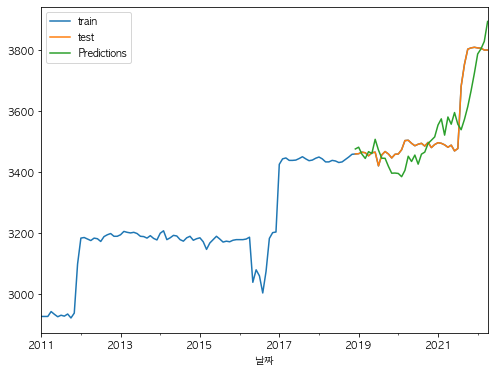

In [278]:
data_t['t'].plot(legend=True, label="train")
test['t'].plot(legend=True, label='test')
test['Predictions'].plot(legend=True, figsize=(8, 6))

In [256]:
print(mean_absolute_percentage_error(test['t'], test['Predictions']))
print(mean_squared_error(test['t'], test['Predictions'])**(0.5))


0.01599099512638373
73.77230959254528


In [258]:
mape_result['LSTM_extra'] = mean_absolute_percentage_error(test['t'], test['Predictions'])
rmse_result['LSTM_extra'] = mean_squared_error(test['t'], test['Predictions'])**(0.5)

In [259]:
mape_result

{'Holt-Winters': 0.028378934439508077,
 'AR': 0.048774179794562375,
 'SARIMAX': 0.01966831892076289,
 'Linear_lag2_12': 0.015975073421226043,
 'Linear_lag2_granger': 0.006279198189420923,
 'Linear_lag2_VIF': 0.009303730499415396,
 'Decision Tree': 0.03080049751031414,
 'Support Vector Machine': 0.09273213012883638,
 'LSTM': 0.016555142831400284,
 'LSTM_extra': 0.01599099512638373}

Text(0.5, 1.0, 'MAPE')

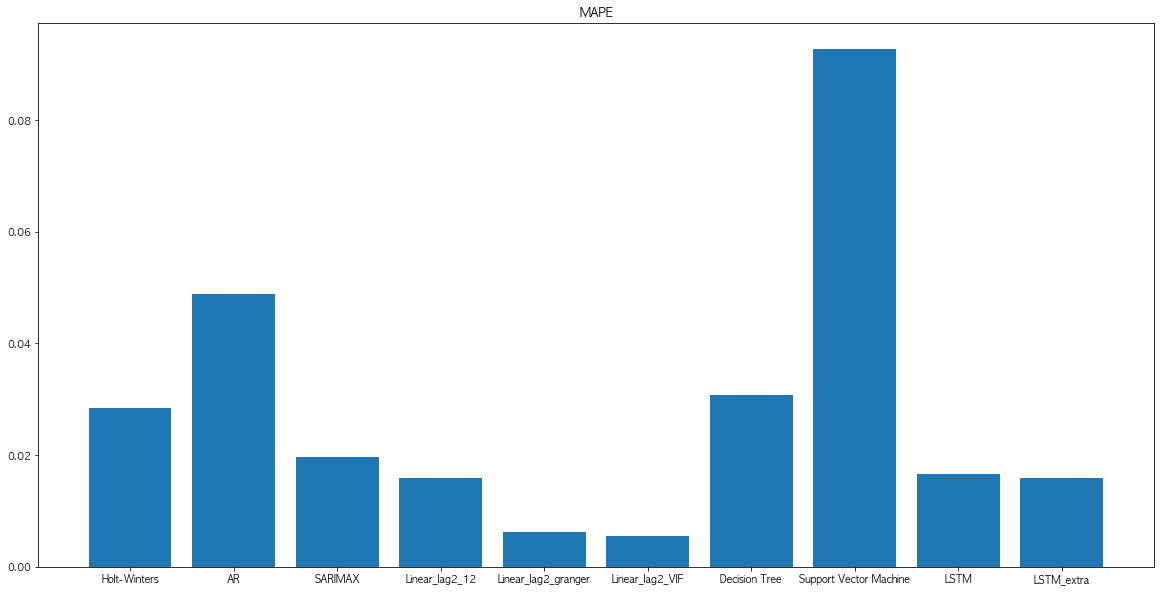

In [313]:
plt.figure(figsize=(20,10))
plt.bar(x=mape_result.keys(), height=mape_result.values())
plt.title("MAPE")

Text(0.5, 1.0, 'RMSE')

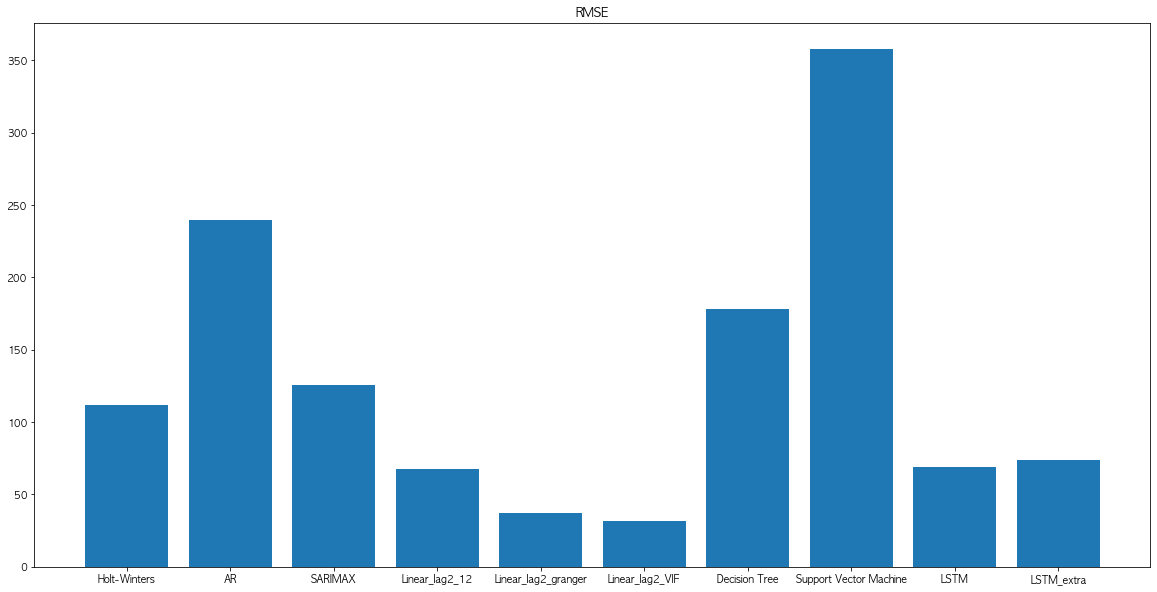

In [314]:
plt.figure(figsize=(20,10))
plt.bar(x=rmse_result.keys(), height=rmse_result.values())
plt.title("RMSE")